# **Proyecto Analítica de Datos**

**Nombres y códigos:** Nicole Álvarez (00320697), Hanz Osorio (00322309) y Lya Hernández (00321509)

**Fecha de entrega:** 2 de mayo del 2023




*El proyecto incluye las siguientes actividades:*

### 1. Generar un Exploratory Data Analysis (EDA) en Python: se deben incluir, por lo menos, los siguientes puntos (sin estar únicamente limitados a los mismos): 


In [3]:
# Se importan las librerias necesarias, con estas se puede trabajar con datos y se pueden manipular, visualizar, crear gráficos y diagramas que ayuden a comprenderlos mejor.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Se cread un dataframe del archivo de CSV necesario
df_PublicHospitalData=pd.read_csv("PublicHospitalDataset.csv", encoding='ISO-8859-1')

1.1 Describir generalmente la base de datos, incluyendo el tamaño, tipos de datos, valores nulos/blancos, valores atípicos

In [5]:
#Este código muestra información general sobre el DataFrame. 
print("")
#Esta línea muestra el tamaño del dataframe
print("Tamaño del DataFrame: ", df_PublicHospitalData.shape)
print("")
print("Tipos de datos: ")
#Esta línea muestra los tipos de datos de cada columna
print("")
print(df_PublicHospitalData.dtypes)
print("")
#Esta línea muestra la cantidad de valores nulos o en blanco en cada columna.
print("Información general de la base de datos:")
print("Valores nulos/blancos: ")
print("")
print(df_PublicHospitalData.isnull().sum())



Tamaño del DataFrame:  (5110, 11)

Tipos de datos: 

Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Stroke                 int64
dtype: object

Información general de la base de datos:
Valores nulos/blancos: 

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64


https://github.com/pandas-dev/pandas/issues/47604 

In [6]:
#Se creó una lista de variables continuas de interés.
variables_continuas = ['Age', 'Avg_glucose_level', 'Bmi']

#Se creó un for para iterar sobre cada variable en la lista de variables continuas
for var in variables_continuas:
    #Se calcula la media y la desviación estándar de la variable
    mean = df_PublicHospitalData[var].mean()
    std = df_PublicHospitalData[var].std()

    #Se calcula el z-score para cada punto de datos
    z_scores = np.abs((df_PublicHospitalData[var] - mean) / std)

    #Se selecciona los puntos de datos con un z-score mayor que 3
    outliers = df_PublicHospitalData[z_scores > 3]

    #Ahora se imprime los valores únicos de los valores atípicos y el número total de valores atípicos para la variable actual
    print('\nVariable:', var)
    print('Valores atípicos únicos:', outliers[var].unique().tolist())
    print('Número total de valores atípicos:', outliers[var].value_counts().sum())


Variable: Age
Valores atípicos únicos: []
Número total de valores atípicos: 0

Variable: Avg_glucose_level
Valores atípicos únicos: [252.72, 243.58, 259.63, 249.31, 263.32, 271.74, 242.52, 250.89, 247.51, 243.53, 242.3, 243.5, 251.6, 247.69, 250.2, 254.6, 254.63, 246.34, 251.46, 267.76, 246.53, 244.28, 251.99, 253.16, 242.84, 249.29, 242.94, 247.48, 266.59, 243.73, 243.59, 250.8, 255.17, 267.61, 260.85, 248.37, 263.56, 247.97, 248.24, 253.93, 254.95, 247.87, 261.67, 256.74, 244.3, 242.62, 243.52, 267.6, 253.86]
Número total de valores atípicos: 49

Variable: Bmi
Valores atípicos únicos: [40000.0]
Número total de valores atípicos: 4


https://gist.github.com/Huud/8e0823fa7be2dcd1bb9f3c418cb94c19 
https://gist.github.com/mnguyenngo/3e0695c138c567852cff966c19ea0354 

1.2 Detallar el criterio empleado para manejo de valores nulos y/o atípicos (si aplica): ¿qué se hizo con ellos?, ¿cómo los gestionaron?, etc.

In [7]:
#Para poder determinar desde que numero atipico se debe eliminar el nivel de glucosa hacemos lo siguiente:
#Se crea una lista de los datos atipicos de la variable requerida que en este caso es "Avg_glucose_level"
lista= [252.72, 243.58, 259.63, 249.31, 263.32, 271.74, 242.52, 250.89, 247.51, 243.53, 242.3, 243.5, 251.6, 247.69, 250.2, 254.6, 254.63, 246.34, 251.46, 267.76, 246.53, 244.28, 251.99, 253.16, 242.84, 249.29, 242.94, 247.48, 266.59, 243.73, 243.59, 250.8, 255.17, 267.61, 260.85, 248.37, 263.56, 247.97, 248.24, 253.93, 254.95, 247.87, 261.67, 256.74, 244.3, 242.62, 243.52, 267.6, 253.86]
#Se crea una variable donde se utiliza la funcion min () para buscar el numero mas pequeño
número_mas_pequeño = min(lista)
#Se imprime la variable
print(número_mas_pequeño)

242.3


In [8]:
#Aqui se filtra el dataframe para que solo contenga las filas donde el valor de la columna "Avg_glucose_level" sea menor o igual a 242
df_PublicHospitalData = df_PublicHospitalData.query('Avg_glucose_level <= 242')

In [9]:
#Esta línea muestra el tamaño del dataframe
df_PublicHospitalData.shape

(5061, 11)

In [10]:
#Se elimina del dataframe las filas que contienen un valor de 40000 en la columna "Bmi"
df_PublicHospitalData=df_PublicHospitalData.drop(df_PublicHospitalData[df_PublicHospitalData['Bmi'] == 40000].index)

In [11]:
#Esta línea muestra el tamaño del dataframe
df_PublicHospitalData.shape

(5057, 11)

Ahora veremos los valores nulos y para saber con que medida estadística rellenar los valores nulos, crearemos un histograma para observar la distribución de los datos:

<ipython-input-12-bba77fbde172>:5: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(df_PublicHospitalData['Bmi'], shade=True, color='pink', kernel='gau')
<ipython-input-12-bba77fbde172>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_PublicHospitalData['Bmi'], shade=True, color='pink', kernel='gau')


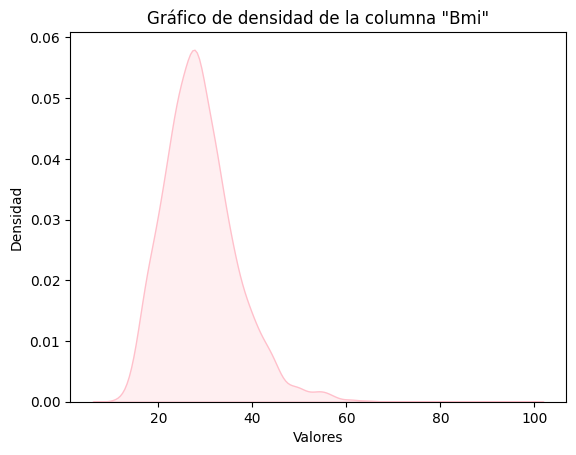

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Se genera un gráfico de densidad de la columna "Bmi" del dataframe utilizando la biblioteca Seaborn.
sns.kdeplot(df_PublicHospitalData['Bmi'], shade=True, color='pink', kernel='gau')

# En esta línea agrega una etiqueta al eje x del gráfico de densidad
plt.xlabel('Valores')

# E esta línea se agrega una etiqueta al eje y del gráfico de densidad
plt.ylabel('Densidad')

# En esta línea se agrega un título al gráfico de densidad. 
plt.title('Gráfico de densidad de la columna "Bmi"')

# En esta línea muestra el gráfico de densidad en la pantalla
plt.show()




https://github.com/clberube/pydlc 

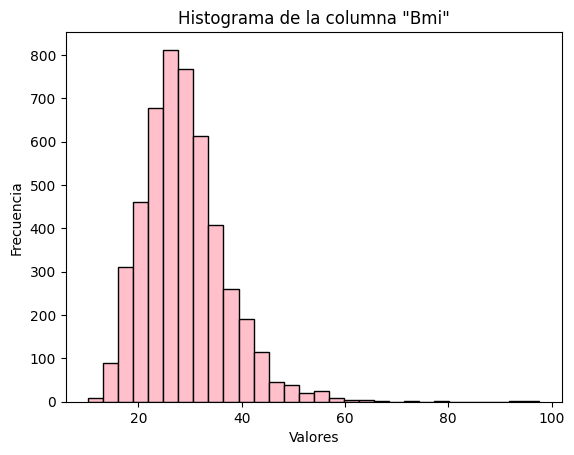

In [13]:

#Se genera un histograma de la columna "Bmi" del dataframe utilizando la biblioteca Matplotlib.
plt.hist(df_PublicHospitalData['Bmi'], bins=30, color=['pink'], edgecolor='black')
#En esta línea agrega una etiqueta al eje x del histograma
plt.xlabel('Valores')
#E esta línea se agrega una etiqueta al eje y del histograma
plt.ylabel('Frecuencia')
#En esta línea se agrega un título al histograma. 
plt.title('Histograma de la columna "Bmi"')
#En esta línea muestra el histograma en la pantalla
plt.show()

https://github.com/tomimester/python-histogram/blob/master/plot-histogram-python-pandas.ipynb 

In [14]:
#En esta línea de código se utiliza la función fillna() de pandas para reemplazar los valores faltantes (NaN) en la columna 'Bmi' del DataFrame con la medida estadistica "moda"
df_PublicHospitalData['Bmi'] = df_PublicHospitalData['Bmi'].fillna(df_PublicHospitalData['Bmi'].mode()[0])


In [15]:
#Esta línea muestra el tamaño del dataframe
df_PublicHospitalData.shape

(5057, 11)

In [16]:
#Aqui para comprobar que ya no existen valores nulos, entonces se cuenta el número de valores nulos en la columna "Bmi" del DataFrame 
df_PublicHospitalData["Bmi"].isnull().sum()

0

Ahora vamos a trabajar con los datos tipo "object", primero determinamos cuantas categorias hay en cada variable:

In [17]:
#Aquí hay un bucle que recorre cada columna del DataFrame 
for col in df_PublicHospitalData.columns:
  #Aquí se verifica si el tipo de datos de la columna actual (representada por la variable 'col') es de tipo 'object'
    if df_PublicHospitalData[col].dtype == 'object':
      #Ahora, si el tipo de datos de la columna actual es de tipo 'object', esta instrucción imprime el nombre de la columna
        print(col + ':')
        #Aquí, se imprime la cantidad de valores únicos que hay en esa columna
        print(df_PublicHospitalData[col].nunique())

Married:
2
Work:
9
Residence:
2
Smoking:
4
Gender:
3


Ahora, ampliamos para ver el nombre y cantidad de las categorias de cada variable:

In [18]:
#Se crea una variable para almacenar los nombres de todas las columnas categóricas
categorical_cols = df_PublicHospitalData.select_dtypes(include=['object']).columns
# Se inicia un bucle que recorre todas las columnas categóricas
for col in categorical_cols:
    #Ahora, esta linea nos ayuda a obtener el conteo de frecuencia para cada valor único de la columna
    freq_count = df_PublicHospitalData[col].value_counts()
    #Se imprime el nombre de la columna
    print(f"\n{col}:")
    #Se imprime el conteo de frecuencia para cada valor único de la columna
    print(freq_count)


Married:
Yes    3305
No     1752
Name: Married, dtype: int64

Work:
Private          2889
Self-employed     804
children          686
Govt_job          649
Never_worked       22
sdfsdf              3
dsfsdf              2
ksdh-k             1
sdsd-i              1
Name: Work, dtype: int64

Residence:
Urban    2567
Rural    2490
Name: Residence, dtype: int64

Smoking:
never smoked       1873
Unknown            1537
formerly smoked     872
smokes              775
Name: Smoking, dtype: int64

Gender:
Female    2964
Male      2092
Other        1
Name: Gender, dtype: int64


In [19]:
#En estas lineas de código se elimina las filas del DataFrame "df_PublicHospitalData" que contienen valores específicos en las columnas 'Work' y 'Gender'.
df_PublicHospitalData= df_PublicHospitalData.drop(df_PublicHospitalData[df_PublicHospitalData['Work'] == 'sdsd-i'].index)
df_PublicHospitalData= df_PublicHospitalData.drop(df_PublicHospitalData[df_PublicHospitalData['Work'] == 'ksdh-k'].index)
df_PublicHospitalData= df_PublicHospitalData.drop(df_PublicHospitalData[df_PublicHospitalData['Work'] == 'dsfsdf'].index)
df_PublicHospitalData= df_PublicHospitalData.drop(df_PublicHospitalData[df_PublicHospitalData['Work'] == 'sdfsdf'].index)
df_PublicHospitalData= df_PublicHospitalData.drop(df_PublicHospitalData[df_PublicHospitalData['Gender'] == 'Other'].index)

In [20]:
#Esta línea muestra el tamaño del dataframe
df_PublicHospitalData.shape

(5049, 11)

In [21]:
#En esta línea crea una lista que contiene los nombres de las columnas del DataFrame df_PublicHospitalData que contienen variables categóricas que queremos convertir en variables ficticias.
v_dummys = ['Married', 'Work', 'Residence', 'Smoking', 'Gender']

#Ahora, este código utiliza la función get_dummies() de la biblioteca Pandas para crear variables ficticias para cada columna de la lista creada y las concatena al DataFrame df_PublicHospitalData.
df_PublicHospitalData = pd.get_dummies(df_PublicHospitalData, columns=v_dummys, prefix=v_dummys, drop_first=True)


In [22]:
#Aqui se devuelve una lista con los nombres de las columnas del DataFrame 
df_PublicHospitalData.columns

Index(['Hypertension', 'Heart Disease', 'Avg_glucose_level', 'Bmi', 'Age',
       'Stroke', 'Married_Yes', 'Work_Never_worked', 'Work_Private',
       'Work_Self-employed', 'Work_children', 'Residence_Urban',
       'Smoking_formerly smoked', 'Smoking_never smoked', 'Smoking_smokes',
       'Gender_Male'],
      dtype='object')

In [23]:
#En estas líneas de código se crea un diccionario que contiene como llave los nombres originales de algunas columnas del DataFrame, y como valor son los nuevos nombres que se desean asignar a esas columnas.
new_names = {'Married_Yes': 'CASADO', 'Work_Never_worked': 'NUNCA_TRABAJO', 
             'Work_Self-employed': 'AUTONOMO', 'Work_children': 'TRABAJO_INFANTIL', 
             'Smoking_formerly smoked': 'EX_FUMADOR', 'Smoking_never smoked': 'NUNCA_FUMO',
             'Smoking_smokes':'FUMA','Gender_Male':'MASCULINO'}

#Ahora utilizamos el método rename() para cambiar los nombres de las columnas
df_PublicHospitalData.rename(columns=new_names, inplace=True)

In [24]:
#Aquí, se muestra las primeras cinco filas del DataFrame
df_PublicHospitalData.head(5)

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke,CASADO,NUNCA_TRABAJO,Work_Private,AUTONOMO,TRABAJO_INFANTIL,Residence_Urban,EX_FUMADOR,NUNCA_FUMO,FUMA,MASCULINO
0,0,1,228.69,36.6,67.0,1,1,0,1,0,0,1,1,0,0,1
1,0,0,202.21,28.7,61.0,1,1,0,0,1,0,0,0,1,0,0
2,0,1,105.92,32.5,80.0,1,1,0,1,0,0,0,0,1,0,1
3,0,0,171.23,34.4,49.0,1,1,0,1,0,0,1,0,0,1,0
4,1,0,174.12,24.0,79.0,1,1,0,0,1,0,0,0,1,0,0


In [25]:
#Para que la base de datos se vea mejor, decidimos enomabrar todas las columnas 
#En estas líneas de código se crea un diccionario que contiene como llave los nombres originales de las columnas del DataFrame, y como valor son los nuevos nombres que se desean asignar a esas columnas.
new_names = {'Hypertension':'HIPERTENSION','Heart Disease':'FALLA_CARDIACA','Avg_glucose_level':'NIVEL_DE_GLUCOSA',
             'Bmi':'IMC','Age':'EDAD','Stroke':'ATAQUE','Married_Yes': 'CASADO', 'Work_Never_worked': 'NUNCA_TRABAJO', 
             'Work_Self-employed': 'AUTONOMO', 'Work_Private': 'TRABAJO_PRIVADO', 'Work_children': 'TRABAJO_INFANTIL', 
             'Residence_Urban' : 'CITADINO','Smoking_formerly smoked': 'EX_FUMADOR', 'Smoking_never smoked': 'NUNCA_FUMO',
             'Smoking_smokes':'FUMA','Gender_Male':'MASCULINO'}

#Ahora utilizamos el método rename() para cambiar los nombres de las columnas
df_PublicHospitalData.rename(columns=new_names, inplace=True)

In [26]:
#Ahora que renombramos las columnas, se ordena el DataFrame según los nombres de las columnas en orden alfabético.
df_PublicHospitalData = df_PublicHospitalData.sort_index(axis=1)

In [27]:
#Ahora, se muestra otra vez las primeras cinco filas del DataFrame
df_PublicHospitalData.head(5)

,ATAQUE,AUTONOMO,CASADO,CITADINO,EDAD,EX_FUMADOR,FALLA_CARDIACA,FUMA,HIPERTENSION,IMC,MASCULINO,NIVEL_DE_GLUCOSA,NUNCA_FUMO,NUNCA_TRABAJO,TRABAJO_INFANTIL,TRABAJO_PRIVADO
0,1,0,1,1,67.0,1,1,0,0,36.6,1,228.69,0,0,0,1
1,1,1,1,0,61.0,0,0,0,0,28.7,0,202.21,1,0,0,0
2,1,0,1,0,80.0,0,1,0,0,32.5,1,105.92,1,0,0,1
3,1,0,1,1,49.0,0,0,1,0,34.4,0,171.23,0,0,0,1
4,1,1,1,0,79.0,0,0,0,1,24.0,0,174.12,1,0,0,0


1.3 Analice la correlación entre variables predictivas. ¿Cuáles variables parecen afectar a la variable respuesta? 

In [28]:
#Primero, se define una lista que contenga el nombre de las variables para calcular las correlaciones.
columnas = ['ATAQUE','AUTONOMO', 'CASADO', 'CITADINO', 'EDAD', 'EX_FUMADOR', 'FALLA_CARDIACA', 'FUMA', 'HIPERTENSION', 
            'IMC', 'MASCULINO','NIVEL_DE_GLUCOSA', 'NUNCA_FUMO','NUNCA_TRABAJO','TRABAJO_INFANTIL','TRABAJO_PRIVADO']

#Aquí, se utiliza un bucle for para iterar sobre todas las combinaciones posibles de pares de variables
for i in range(len(columnas)):
    for j in range(i+1, len(columnas)):
      #Se utiliza el método corr() de pandas para calcular la correlación entre las variables columnas[i] y columnas[j] y el resultado se almacena en una variable
        corr_ij = df_PublicHospitalData[columnas[i]].corr(df_PublicHospitalData[columnas[j]])
        #Ahora, se imprime para poder mostrar el valor de la correlación entre las dos variables, junto con los nombres de las variables correspondientes
        print(f"Correlación entre {columnas[i]} y {columnas[j]}: {corr_ij}")

Correlación entre ATAQUE y AUTONOMO: 0.06666373720312231
Correlación entre ATAQUE y CASADO: 0.104966304138634
Correlación entre ATAQUE y CITADINO: 0.01725769381574976
Correlación entre ATAQUE y EDAD: 0.24162591773676828
Correlación entre ATAQUE y EX_FUMADOR: 0.06416853320993153
Correlación entre ATAQUE y FALLA_CARDIACA: 0.12324230396191967
Correlación entre ATAQUE y FUMA: 0.006649956829541349
Correlación entre ATAQUE y HIPERTENSION: 0.11803915465429612
Correlación entre ATAQUE y IMC: 0.03318140638963493
Correlación entre ATAQUE y MASCULINO: 0.004528793277572226
Correlación entre ATAQUE y NIVEL_DE_GLUCOSA: 0.11889288318778134
Correlación entre ATAQUE y NUNCA_FUMO: -0.004066391074086391
Correlación entre ATAQUE y NUNCA_TRABAJO: -0.014713896535796703
Correlación entre ATAQUE y TRABAJO_INFANTIL: -0.08273949979661568
Correlación entre ATAQUE y TRABAJO_PRIVADO: 0.007300602025296205
Correlación entre AUTONOMO y CASADO: 0.19169544683425754
Correlación entre AUTONOMO y CITADINO: 0.0086925373269

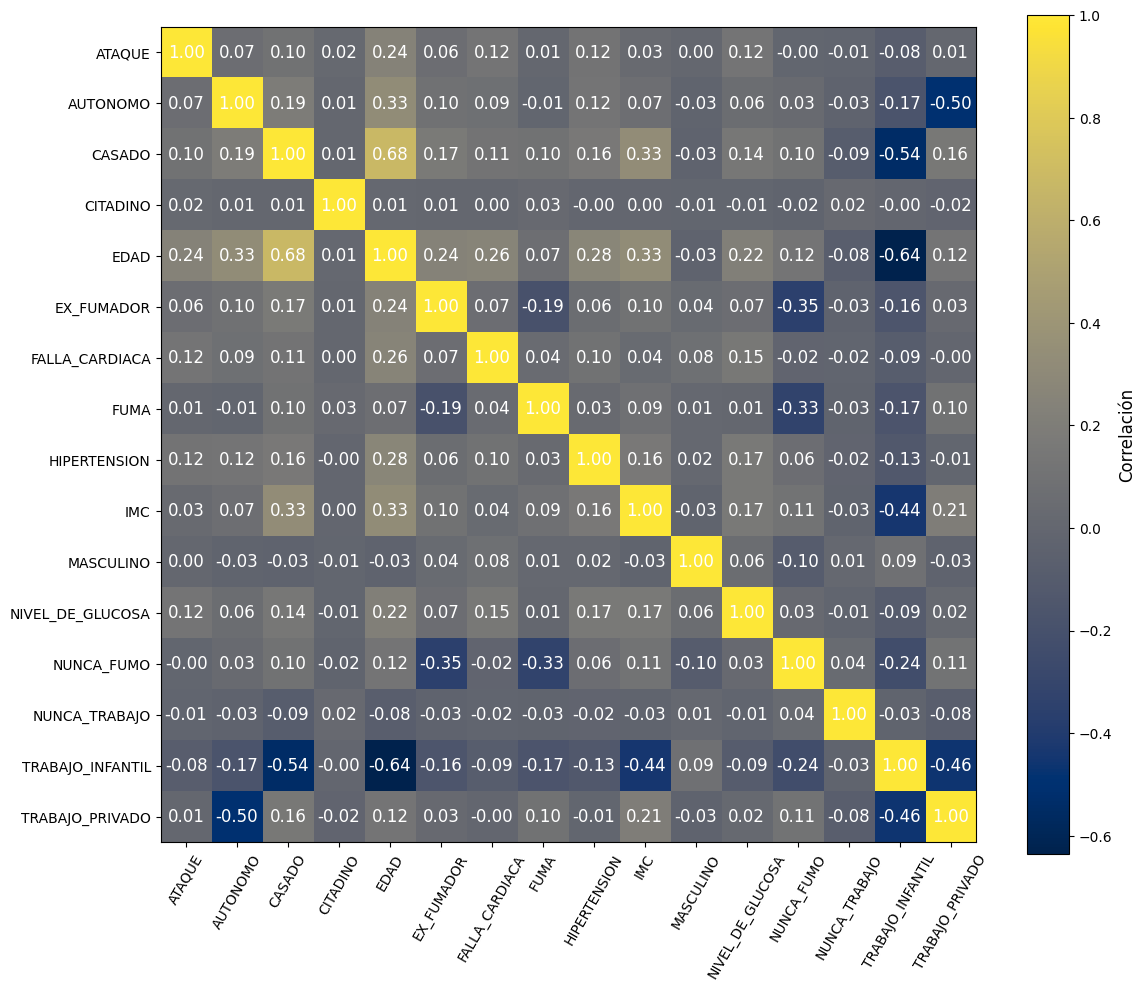

In [29]:
#Se selecciona las columnas a considerar en la matriz de correlación
columnas = ['ATAQUE','AUTONOMO', 'CASADO', 'CITADINO', 'EDAD', 'EX_FUMADOR', 'FALLA_CARDIACA', 'FUMA',
            'HIPERTENSION', 'IMC', 'MASCULINO','NIVEL_DE_GLUCOSA', 'NUNCA_FUMO','NUNCA_TRABAJO',
            'TRABAJO_INFANTIL','TRABAJO_PRIVADO']

#Se calcula la matriz de correlación
matriz_correlacion = df_PublicHospitalData[columnas].corr()

#Se crea el mapa de calor
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(matriz_correlacion.values, cmap='cividis')

#Se agrega etiquetas de las variables en los ejes x e y
variables = list(matriz_correlacion.columns)
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(variables)))
ax.set_xticklabels(variables, fontsize=10, rotation=60)
ax.set_yticklabels(variables, fontsize=10)

#Se agrega anotaciones de los valores de correlación en cada celda
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, f"{matriz_correlacion.values[i, j]:.2f}",
                       ha="center", va="center", color="w", fontsize=12)

#Se agrega barra de color
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlación", fontsize=12)

#Se ajusta la disposición de los elementos del gráfico
plt.tight_layout()

#Se muestra el gráfico
plt.show()


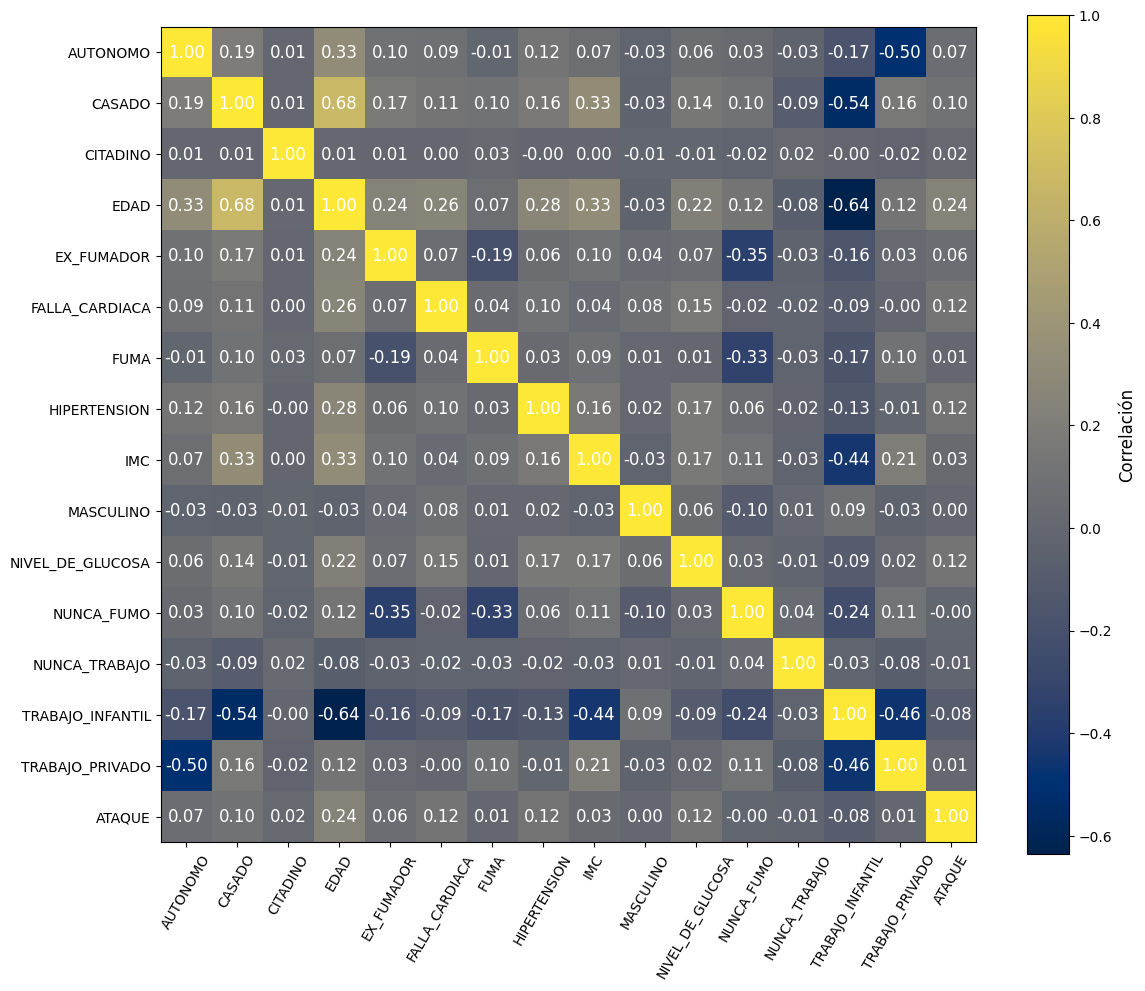

In [30]:
# Se seleccionan las columnas a considerar en la matriz de correlación
columnas = ['AUTONOMO', 'CASADO', 'CITADINO', 'EDAD', 'EX_FUMADOR', 'FALLA_CARDIACA', 'FUMA', 'HIPERTENSION', 'IMC', 'MASCULINO', 'NIVEL_DE_GLUCOSA', 'NUNCA_FUMO', 'NUNCA_TRABAJO', 'TRABAJO_INFANTIL', 'TRABAJO_PRIVADO', 'ATAQUE']

# Se calcula la matriz de correlación
matriz_correlacion = df_PublicHospitalData[columnas].corr()

# Se crea el mapa de calor
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(matriz_correlacion.values, cmap='cividis')

# Se agrega etiquetas de las variables en los ejes x e y
variables = list(matriz_correlacion.columns)
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(variables)))
ax.set_xticklabels(variables, fontsize=10, rotation=60)
ax.set_yticklabels(variables, fontsize=10)

# Se agrega anotaciones de los valores de correlación en cada celda
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, f"{matriz_correlacion.values[i, j]:.2f}",
                       ha="center", va="center", color="w", fontsize=12)

# Se agrega barra de color
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlación", fontsize=12)

# Se ajusta la disposición de los elementos del gráfico
plt.tight_layout()

# Se muestra el gráfico
plt.show()


https://github.com/easystats/correlation 

1.4 Visualización de Datos: Visualice todas las variables predictivas y describa su distribución. Analice la distribución de la variable respuesta.

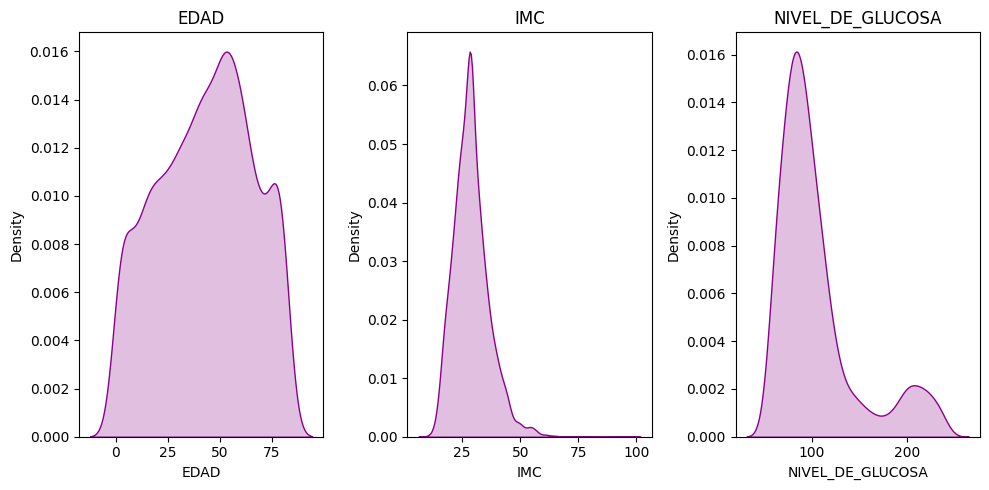

In [31]:
#Ahora, creamos una figura con 3 subplots de tamaño 8x4 pulgadas
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

#Creamos un gráfico de densidad para la variable 'EDAD' en el primer subplot
sns.kdeplot(df_PublicHospitalData['EDAD'], color='#8B008B', fill=True, ax=axs[0])
axs[0].set_title('EDAD')

sns.kdeplot(df_PublicHospitalData['IMC'], color='#8B008B', fill=True, ax=axs[1])
axs[1].set_title('IMC')

#Creamos un gráfico de densidad para la variable 'NIVEL_DE_GLUCOSA' en el segundo subplot


#Creamos un gráfico de densidad para la variable 'IMC' en el tercer subplot
sns.kdeplot(df_PublicHospitalData['NIVEL_DE_GLUCOSA'], color='#8B008B', fill=True, ax=axs[2])
axs[2].set_title('NIVEL_DE_GLUCOSA')



plt.tight_layout()
#Por ultimo, mostramos el gráfico
plt.show()


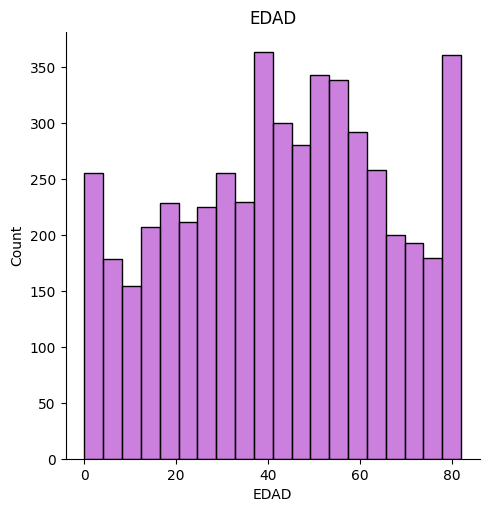

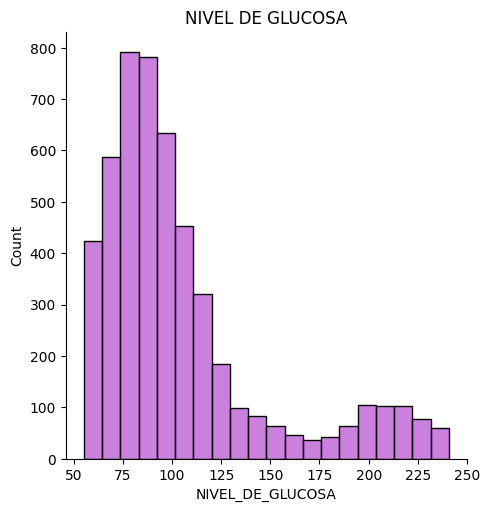

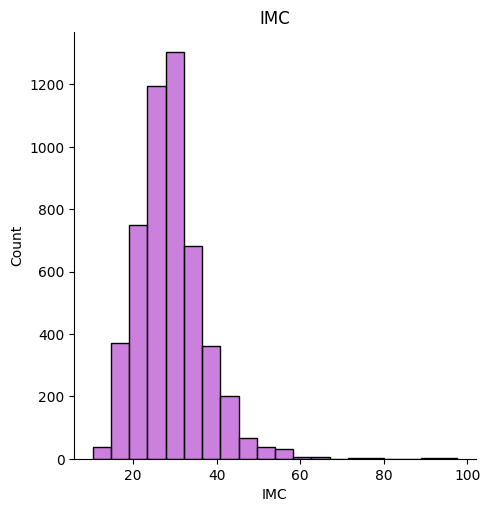

In [32]:
#Se rea un histograma de la variable "EDAD" en el conjunto de datos
sns.displot(df_PublicHospitalData, x='EDAD', bins=20, color='#BA55D3', edgecolor='black')
plt.title('EDAD')
plt.show()

#Se crea un histograma de la variable "NIVEL_DE_GLUCOSA" en el conjunto de datos
sns.displot(df_PublicHospitalData, x='NIVEL_DE_GLUCOSA', bins=20, color='#BA55D3', edgecolor='black')
plt.title('NIVEL DE GLUCOSA')
plt.show()

#Se crea un histograma de la variable "IMC" en el conjunto de datos
sns.displot(df_PublicHospitalData, x='IMC', bins=20, color='#BA55D3', edgecolor='black')
plt.title('IMC')

#Por ultimo, mostramos el gráfico
plt.show()




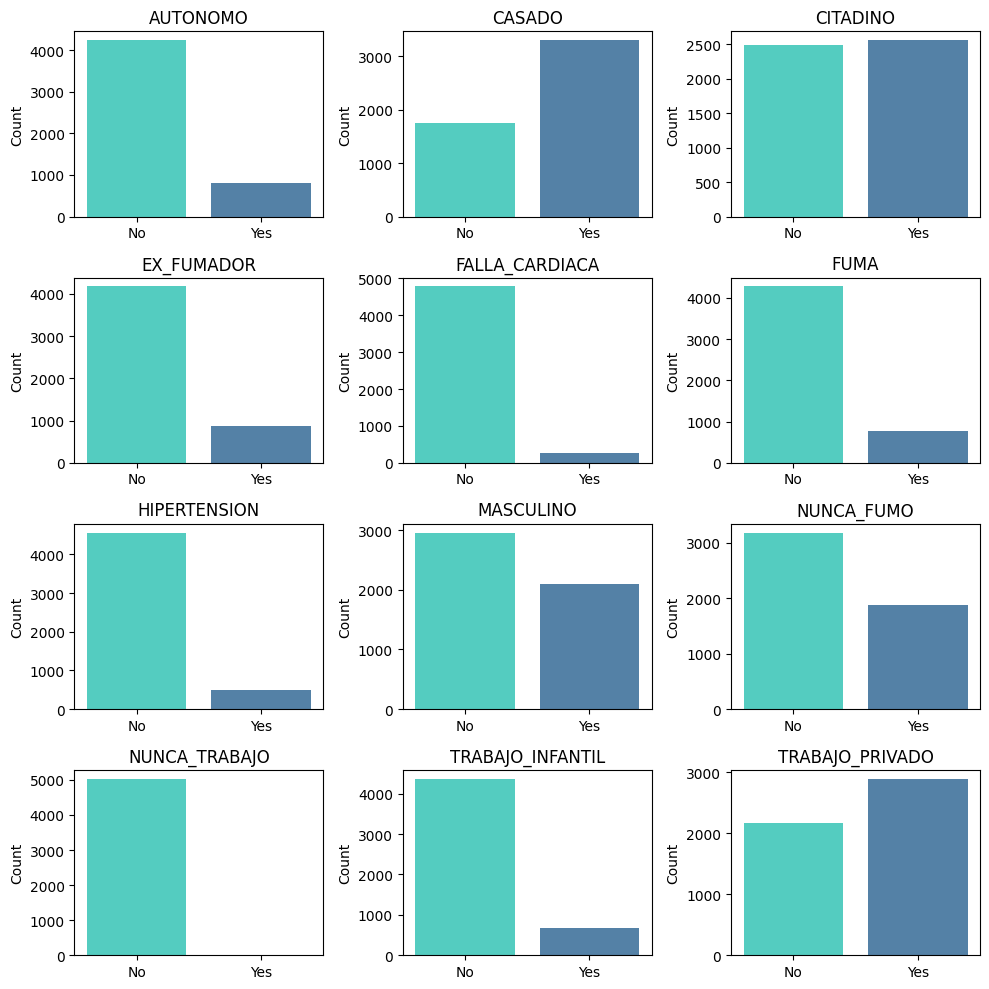

In [33]:
#La primera línea crea una figura y un conjunto de subplots 
fig, axs = plt.subplots(4, 3, figsize=(10, 10))

#Aqui, se definio las etiquetas de los ejes x e y que se utilizarán en cada gráfico de barras 
xlabel = ['No', 'Yes']
ylabel = 'Count'

#Aquí, se definio los colores de las barras
bar_colors = ['turquoise', 'steelblue']

# Gráficas de barras para las variables categóricas

#Se crea un gráfico de barras para cada una de las 12 variables categóricas en el DataFrame, 
#donde se especifica la variable categórica que se va a graficar en el eje x, el DataFrame donde se encuentran los datos,
#el subplot correspondiente y los colores de las barras. Además, se establece un título para el gráfico, se eliminan 
#las etiquetas del eje x, se establecen las etiquetas del eje x para que sean 'No' y 'Yes', se establece una etiqueta
#para el eje y y se establece el tamaño de fuente para los títulos y etiquetas del eje x e y.
sns.countplot(x='AUTONOMO', data=df_PublicHospitalData, ax=axs[0,0], palette=bar_colors)
axs[0,0].set_title('AUTONOMO', fontsize=12)
axs[0,0].set_xlabel('')
axs[0,0].set_xticklabels(xlabel, fontsize=10)
axs[0,0].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='CASADO', data=df_PublicHospitalData, ax=axs[0,1], palette=bar_colors)
axs[0,1].set_title('CASADO', fontsize=12)
axs[0,1].set_xlabel('')
axs[0,1].set_xticklabels(xlabel, fontsize=10)
axs[0,1].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='CITADINO', data=df_PublicHospitalData, ax=axs[0,2], palette=bar_colors)
axs[0,2].set_title('CITADINO', fontsize=12)
axs[0,2].set_xlabel('')
axs[0,2].set_xticklabels(xlabel, fontsize=10)
axs[0,2].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='EX_FUMADOR', data=df_PublicHospitalData, ax=axs[1,0], palette=bar_colors)
axs[1,0].set_title('EX_FUMADOR', fontsize=12)
axs[1,0].set_xlabel('')
axs[1,0].set_xticklabels(xlabel, fontsize=10)
axs[1,0].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='FALLA_CARDIACA', data=df_PublicHospitalData, ax=axs[1,1], palette=bar_colors)
axs[1,1].set_title('FALLA_CARDIACA', fontsize=12)
axs[1,1].set_xlabel('')
axs[1,1].set_xticklabels(xlabel, fontsize=10)
axs[1,1].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='FUMA', data=df_PublicHospitalData, ax=axs[1,2], palette=bar_colors)
axs[1,2].set_title('FUMA', fontsize=12)
axs[1,2].set_xlabel('')
axs[1,2].set_xticklabels(xlabel, fontsize=10)
axs[1,2].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='HIPERTENSION', data=df_PublicHospitalData, ax=axs[2,0], palette=bar_colors)
axs[2,0].set_title('HIPERTENSION', fontsize=12)
axs[2,0].set_xlabel('')
axs[2,0].set_xticklabels(xlabel, fontsize=10)
axs[2,0].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='MASCULINO', data=df_PublicHospitalData, ax=axs[2,1], palette=bar_colors)
axs[2,1].set_title('MASCULINO', fontsize=12)
axs[2,1].set_xlabel('')
axs[2,1].set_xticklabels(xlabel, fontsize=10)
axs[2,1].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='NUNCA_FUMO', data=df_PublicHospitalData, ax=axs[2,2], palette=bar_colors)
axs[2,2].set_title('NUNCA_FUMO', fontsize=12)
axs[2,2].set_xlabel('')
axs[2,2].set_xticklabels(xlabel, fontsize=10)
axs[2,2].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='NUNCA_TRABAJO', data=df_PublicHospitalData, ax=axs[3,0], palette=bar_colors)
axs[3,0].set_title('NUNCA_TRABAJO', fontsize=12)
axs[3,0].set_xlabel('')
axs[3,0].set_xticklabels(xlabel, fontsize=10)
axs[3,0].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='TRABAJO_INFANTIL', data=df_PublicHospitalData, ax=axs[3,1], palette=bar_colors)
axs[3,1].set_title('TRABAJO_INFANTIL', fontsize=12)
axs[3,1].set_xlabel('')
axs[3,1].set_xticklabels(xlabel, fontsize=10)
axs[3,1].set_ylabel(ylabel, fontsize=10)

sns.countplot(x='TRABAJO_PRIVADO', data=df_PublicHospitalData, ax=axs[3,2], palette=bar_colors)
axs[3,2].set_title('TRABAJO_PRIVADO', fontsize=12)
axs[3,2].set_xlabel('')
axs[3,2].set_xticklabels(xlabel, fontsize=10)
axs[3,2].set_ylabel(ylabel, fontsize=10)

#Ajustamos los espacios entre subplots para evitar solapamiento de gráficos
plt.tight_layout()
#Por ultimo, mostramos el gráfico
plt.show()


https://github.com/d3/d3 

In [34]:
from pandas.core.series import Float64Index
# Calcular la frecuencia de AUTONOMO
f1 = df_PublicHospitalData['AUTONOMO'].value_counts()
# Imprimir la frecuencia
print(f1)

# Calcular la frecuencia de CASADO
f2 = df_PublicHospitalData['CASADO'].value_counts()
# Imprimir la frecuencia
print(f2)

# Calcular la frecuencia de CITADINO
f3 = df_PublicHospitalData['CITADINO'].value_counts()
# Imprimir la frecuencia
print(f3)

# Calcular la frecuencia de EX FUMADOR
f4 = df_PublicHospitalData['EX_FUMADOR'].value_counts()
# Imprimir la frecuencia
print(f4)

# Calcular la frecuencia de FALLA CARDIACA
f5 = df_PublicHospitalData['FALLA_CARDIACA'].value_counts()
# Imprimir la frecuencia
print(f5)

# Calcular la frecuencia de FUMA
f6 = df_PublicHospitalData['FUMA'].value_counts()
# Imprimir la frecuencia
print(f6)

# Calcular la frecuencia de HIPERTENSION
f7 = df_PublicHospitalData['HIPERTENSION'].value_counts()
# Imprimir la frecuencia
print(f7)

# Calcular la frecuencia de MASCULINO
f8 = df_PublicHospitalData['MASCULINO'].value_counts()
# Imprimir la frecuencia
print(f8)

# Calcular la frecuencia de NUNCA_FUMO
f9 = df_PublicHospitalData['NUNCA_FUMO'].value_counts()
# Imprimir la frecuencia
print(f9)

# Calcular la frecuencia de NUNCA_TRABAJO
f10 = df_PublicHospitalData['NUNCA_TRABAJO'].value_counts()
# Imprimir la frecuencia
print(f10)

# Calcular la frecuencia de TRABAJO_INFANTIL
f11 = df_PublicHospitalData['TRABAJO_INFANTIL'].value_counts()
# Imprimir la frecuencia
print(f11)

# Calcular la frecuencia de TRABAJO_PRIVADO
f12 = df_PublicHospitalData['TRABAJO_PRIVADO'].value_counts()
# Imprimir la frecuencia
print(f12)

0    4245
1     804
Name: AUTONOMO, dtype: int64
1    3300
0    1749
Name: CASADO, dtype: int64
1    2562
0    2487
Name: CITADINO, dtype: int64
0    4178
1     871
Name: EX_FUMADOR, dtype: int64
0    4783
1     266
Name: FALLA_CARDIACA, dtype: int64
0    4276
1     773
Name: FUMA, dtype: int64
0    4565
1     484
Name: HIPERTENSION, dtype: int64
0    2957
1    2092
Name: MASCULINO, dtype: int64
0    3180
1    1869
Name: NUNCA_FUMO, dtype: int64
0    5027
1      22
Name: NUNCA_TRABAJO, dtype: int64
0    4363
1     686
Name: TRABAJO_INFANTIL, dtype: int64
1    2888
0    2161
Name: TRABAJO_PRIVADO, dtype: int64


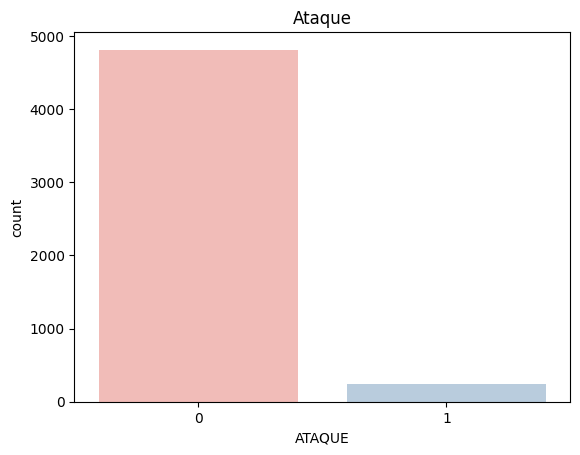

In [35]:
#Se crea un gráfico de barras utilizando la biblioteca Seaborn, entonces la variable "ATAQUE" se establece como el eje x, tomando los datos del DataFrame con una paleta de colores respectivamente
sns.countplot(x='ATAQUE', data=df_PublicHospitalData, palette='Pastel1')
#Se establece el título del gráfico en "Ataque"
plt.title('Ataque')
#Se muestra el gráfico
plt.show()


In [36]:
# Calcular la frecuencia de la variable
frecuencia = df_PublicHospitalData['ATAQUE'].value_counts()

# Imprimir la frecuencia
print(frecuencia)

0    4811
1     238
Name: ATAQUE, dtype: int64


### 2. La base de datos no está balanceada (en inglés conocida como unbalanced dataset). Investigue que es una base de datos no balanceada utilizando fuentes de referencia confiables (libros y papers), los problemas con este tipo de base de datos y al menos dos técnicas utilizadas durante el entrenamiento del algoritmo para reducir su efecto negativo.
### 3. Divida la base de datos en un set de entrenamiento, un set de validación y un set de prueba. Justifique en base a la literatura el porcentaje de datos que se va a cada set (incluya al menos una referencia de papers o libros sobre este porcentaje, los slides de la clase no es una referencia válida) 

In [37]:
#Esta línea importa la función train_test_split, la cua es una función que se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split
#Esta línea importa la clase RandomUnderSampler, la cual se utiliza para submuestrear un conjunto de datos desequilibrado.
from imblearn.under_sampling import RandomUnderSampler
#Esta línea importa la clase RandomOverSampler, la cual se utiliza para sobremuestrear un conjunto de datos desequilibrado.
from imblearn.over_sampling import RandomOverSampler

#Se divide en conjunto de entrenamiento y prueba (80-20)
X_train_val, X_test, y_train_val, y_test = train_test_split(df_PublicHospitalData.drop('ATAQUE', axis=1), df_PublicHospitalData['ATAQUE'], test_size=0.2, random_state=1)

#Se divide en conjunto de entrenamiento y validación (60-20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)

#Esta línea imprime el número de filas del conjunto de entrenamiento original.
print("Número de filas en el conjunto de entrenamiento:", X_train.shape[0])
#Esta línea muestra el número de filas del conjunto de validación.
print("Número de filas en el conjunto de validación:", X_val.shape[0])
#Esta línea muestra el número de filas del conjunto de prueba.
print("Número de filas en el conjunto de prueba:", X_test.shape[0])


Número de filas en el conjunto de entrenamiento: 3029
Número de filas en el conjunto de validación: 1010
Número de filas en el conjunto de prueba: 1010


https://gist.github.com/yavuzKomecoglu/0c5c63cd7c832d39a8572b9db34fa038 

In [38]:
#Se importa la clase RandomOverSampler de la biblioteca imblearn
RanOver = RandomOverSampler(random_state=1)
#Esta linda crea dos nuevas matrices X_train_resampled_ro e y_train_resampled_ro, que contienen la característica remuestreada y los datos objetivo respectivamente.
X_train_resampled_ro, y_train_resampled_ro = RanOver.fit_resample(X_train, y_train)

# utilizar RandomUnderSampler para reducir la cantidad de muestras en la clase mayoritaria en el conjunto de entrenamiento
#Se importa la clase RandomUnderSampler de la biblioteca imblearn
RanUnder = RandomUnderSampler(random_state=1)
#Crea dos nuevas matrices X_train_resampled_ru e y_train_resampled_ru, que contienen la característica remuestreada y los datos objetivo respectivamente
X_train_resampled_ru, y_train_resampled_ru = RanUnder.fit_resample(X_train, y_train)
# Esta línea muestra el número de filas del conjunto de entrenamiento sobremuestreado.
print("Registros en el conjunto de entrenamiento RanOver:", X_train_resampled_ro.shape[0])

# Esta línea muestra el número de filas del conjunto de entrenamiento con muestreo insuficiente. 
print("Registros en el conjunto de entrenamiento RanUnder:", X_train_resampled_ru.shape[0])


Registros en el conjunto de entrenamiento RanOver: 5796
Registros en el conjunto de entrenamiento RanUnder: 262


https://github.com/scikit-learn-contrib/imbalanced-learn/blob/master/imblearn/over_sampling/_random_over_sampler.py 
https://github.com/scikit-learn-contrib/imbalanced-learn/blob/master/imblearn/under_sampling/_prototype_selection/_random_under_sampler.py 

### 4. Implemente un algoritmo y estadísticamente pruebe cuál de las dos técnicas mencionadas en el punto anterior mejora la predicción. En la presentación y reporte debe explicar la técnica estadística utilizada. 

In [39]:
# importar bibliotecas necesarias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Estas líneas de código importan varios módulos y funciones de las bibliotecas scikit-learn y matplotlib que son necesarios para construir y evaluar el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# importar funciones de división de datos y mapa de colores personalizados
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns


Random Over Sampler

In [40]:
#Se importa la función accuracy_score del módulo sklearn.metrics, que se utilizará para calcular la precisión del modelo de regresión logística.
from sklearn.metrics import accuracy_score
#Instalar el modelo
logreg = LogisticRegression()

#Este ajusta el modelo de regresión logística a los datos de entrenamiento remuestreados (X_train_resampled_ro y y_train_resampled_ro), que se han equilibrado mediante la técnica de sobremuestreo aleatorio.
logreg.fit(X_train_resampled_ro, y_train_resampled_ro)

#Se realiza predicciones sobre el conjunto de pruebas (X_prueba) utilizando el modelo de regresión logística ajustado en el paso anterior.
y_pred_ro = logreg.predict(X_test)

#Calcula las probabilidades predichas para la clase positiva (es decir, la clase 1) utilizando el método predict_proba() del modelo de regresión logística
y_pred_probs_ro = logreg.predict_proba(X_test)[:, 1]

#Esto imprime las 10 primeras probabilidades predichas para la clase positiva.
print(y_pred_probs_ro[:10])

#Calcula la precisión del modelo de regresión logística en el conjunto de prueba comparando las etiquetas predichas (y_pred_ro) con las etiquetas verdaderas (y_test), y devuelve un único valor entre 0 y 1.
accuracy = accuracy_score(y_test, y_pred_ro)

# Imprime la puntuación de "precisión" del modelo de regresión logística en el conjunto de prueba.
print('Accuracy:', accuracy)

[0.24071888 0.09623609 0.16422542 0.27097854 0.00291956 0.05838498
 0.52845168 0.02701914 0.25053471 0.33017552]
Accuracy: 0.7564356435643564


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20in%20Python%20-%20Step%20by%20Step.ipynb 

In [41]:
# Importar las bibliotecas necesarias
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Definir la función evaluate_model que toma como entrada las predicciones verdaderas, las predicciones del modelo y las probabilidades de predicción
def evaluate_model(y_true, y_pred, y_prob):
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    # Calcular el informe de clasificación
    cr = classification_report(y_true, y_pred)
    print("Classification Report:\n", cr)
    
    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calcular e imprimir las métricas de evaluación
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1_score)
    print("AUC:", roc_auc)
    print('Un area bajo ROC de {}% significa que este modelo es {}% mejor que adivinar al azar'.format(round(roc_auc*100, 0), round(roc_auc*100-50, 0) ))


https://github.com/ilyajob05/ROC_calculation 
https://github.com/sandyy2505/personal-loan-modelling 
https://github.com/yzhuoning/LibAUC 


[[718 235]
 [ 11  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       953
           1       0.16      0.81      0.27        57

    accuracy                           0.76      1010
   macro avg       0.57      0.78      0.56      1010
weighted avg       0.94      0.76      0.82      1010



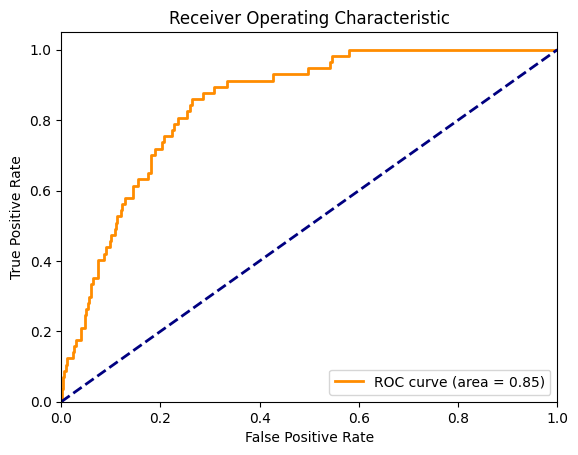

Accuracy: 0.7564356435643564
Precision: 0.16370106761565836
Recall: 0.8070175438596491
F1-score: 0.27218934911242604
AUC: 0.8478304891294343
Un area bajo ROC de 85.0% significa que este modelo es 35.0% mejor que adivinar al azar


In [42]:
#Se utiliza la función confusion_matrix de scikit-learn para calcular la matriz de confusión entre las etiquetas verdaderas
mc= confusion_matrix(y_test, y_pred_ro)
print (mc)
#Aqui, llama a la función evaluate_model, que toma como argumentos las etiquetas verdaderas, las etiquetas predichas y las probabilidades predichas, y calcula e imprime una serie de métricas de evaluación de la calidad del modelo
evaluate_model(y_test, y_pred_ro, y_pred_probs_ro)


Random Under Sampler

In [43]:
#Se crea un objeto modelo de regresión logística
logreg = LogisticRegression()

#Se entrena el modelo en los datos de entrenamiento remuestreados obtenidos mediante submuestreo aleatorio.
logreg.fit(X_train_resampled_ru, y_train_resampled_ru)

#Se realiza predicciones sobre el conjunto de pruebas utilizando el modelo entrenado
y_pred_ru = logreg.predict(X_test)

#Predecir probabilidades
y_pred_probs_ru = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs_ru[:10])

#Se calcula la puntuación de precisión en el conjunto de pruebas utilizando las etiquetas predichas del modelo.
accuracy = accuracy_score(y_test, y_pred_ru)

#Se imprime la puntuación de precisión.
print('Accuracy:', accuracy)

[0.20058267 0.07008466 0.09842842 0.26687976 0.00194619 0.03271475
 0.59253345 0.0083103  0.27501435 0.47202644]
Accuracy: 0.7425742574257426


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       953
           1       0.16      0.81      0.26        57

    accuracy                           0.74      1010
   macro avg       0.57      0.77      0.55      1010
weighted avg       0.94      0.74      0.81      1010



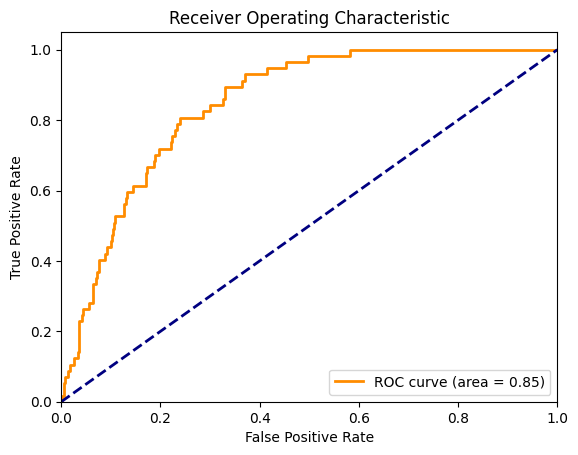

Accuracy: 0.7425742574257426
Precision: 0.15593220338983052
Recall: 0.8070175438596491
F1-score: 0.26136363636363635
AUC: 0.8462841258445168
Un area bajo ROC de 85.0% significa que este modelo es 35.0% mejor que adivinar al azar


In [44]:
#Se calcula y muestra la matriz de confusión para comparar las clases reales (y_test) y las predicciones
confusion_matrix(y_test, y_pred_ru)
#Aqui, la función evaluate_model toma como entrada las clases reales, las predicciones y las probabilidades predichas, y utiliza la matriz de confusión para calcular e imprimir métricas 
evaluate_model(y_test, y_pred_ru, y_pred_probs_ru)

Prueba estadística 

In [45]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from scipy.stats import friedmanchisquare
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model
model = KNeighborsClassifier(n_neighbors=6)

# Define the number of folds for cross-validation
n_folds = 5

# Define the Random Over Sampler and Random Under Sampler objects
over_sampler = RandomOverSampler()
under_sampler = RandomUnderSampler()

# Balance the dataset with different techniques
X_ros, y_ros = over_sampler.fit_resample(X_train, y_train)
X_rus, y_rus = under_sampler.fit_resample(X_train, y_train)

# Perform cross-validation on the models trained on the balanced data
ros_scores = cross_val_score(model, X_ros, y_ros, cv=n_folds, scoring='accuracy')
rus_scores = cross_val_score(model, X_rus, y_rus, cv=n_folds, scoring='accuracy')
orig_scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='accuracy')

# Create a list with the scores of each model
scores = [ros_scores, rus_scores, orig_scores]

# Perform the Friedman test
result = friedmanchisquare(*scores)

# Print the results
print(f"Accuracy of Random Over Sampler model: {ros_scores.mean():.3f}")
print(f"Accuracy of Random Under Sampler model: {rus_scores.mean():.3f}")


Accuracy of Random Over Sampler model: 0.939
Accuracy of Random Under Sampler model: 0.771


https://github.com/topics/friedman-test

### 5. Aplique al menos 4 algoritmos en la base de datos utilizando la mejor estrategia de entrenamiento descubierta en el punto 4.

5.1 Al menos 1 algoritmos debe ser un ensamble.


Árbol de decisión-RandomOverSampler


In [46]:
# Este código importa las bibliotecas y módulos necesarios para construir un modelo clasificador de árbol de decisión 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [47]:
# El parámetro random_state se utiliza para controlar el generador de números aleatorios y garantiza que se obtengan los mismos resultados cada vez que se ejecuta el código.
clf = DecisionTreeClassifier(random_state=42)

# El clasificador utilizando los datos de entrenamiento remuestreados X_train_resampled_ro y las etiquetas objetivo correspondientes y_train_resampled_ro.
clf.fit(X_train_resampled_ro, y_train_resampled_ro)

#Utiliza el clasificador entrenado para hacer predicciones sobre los datos de prueba X_test, y almacena las etiquetas de clase predichas en la variable y_pred.
y_pred = clf.predict(X_test)

# Calcule la puntuación de precisión del modelo comparando las etiquetas predichas y_pred con las etiquetas verdaderas y_test
accuracy = accuracy_score(y_test, y_pred)
print("La precisión del modelo es:", accuracy)

La precisión del modelo es: 0.9158415841584159


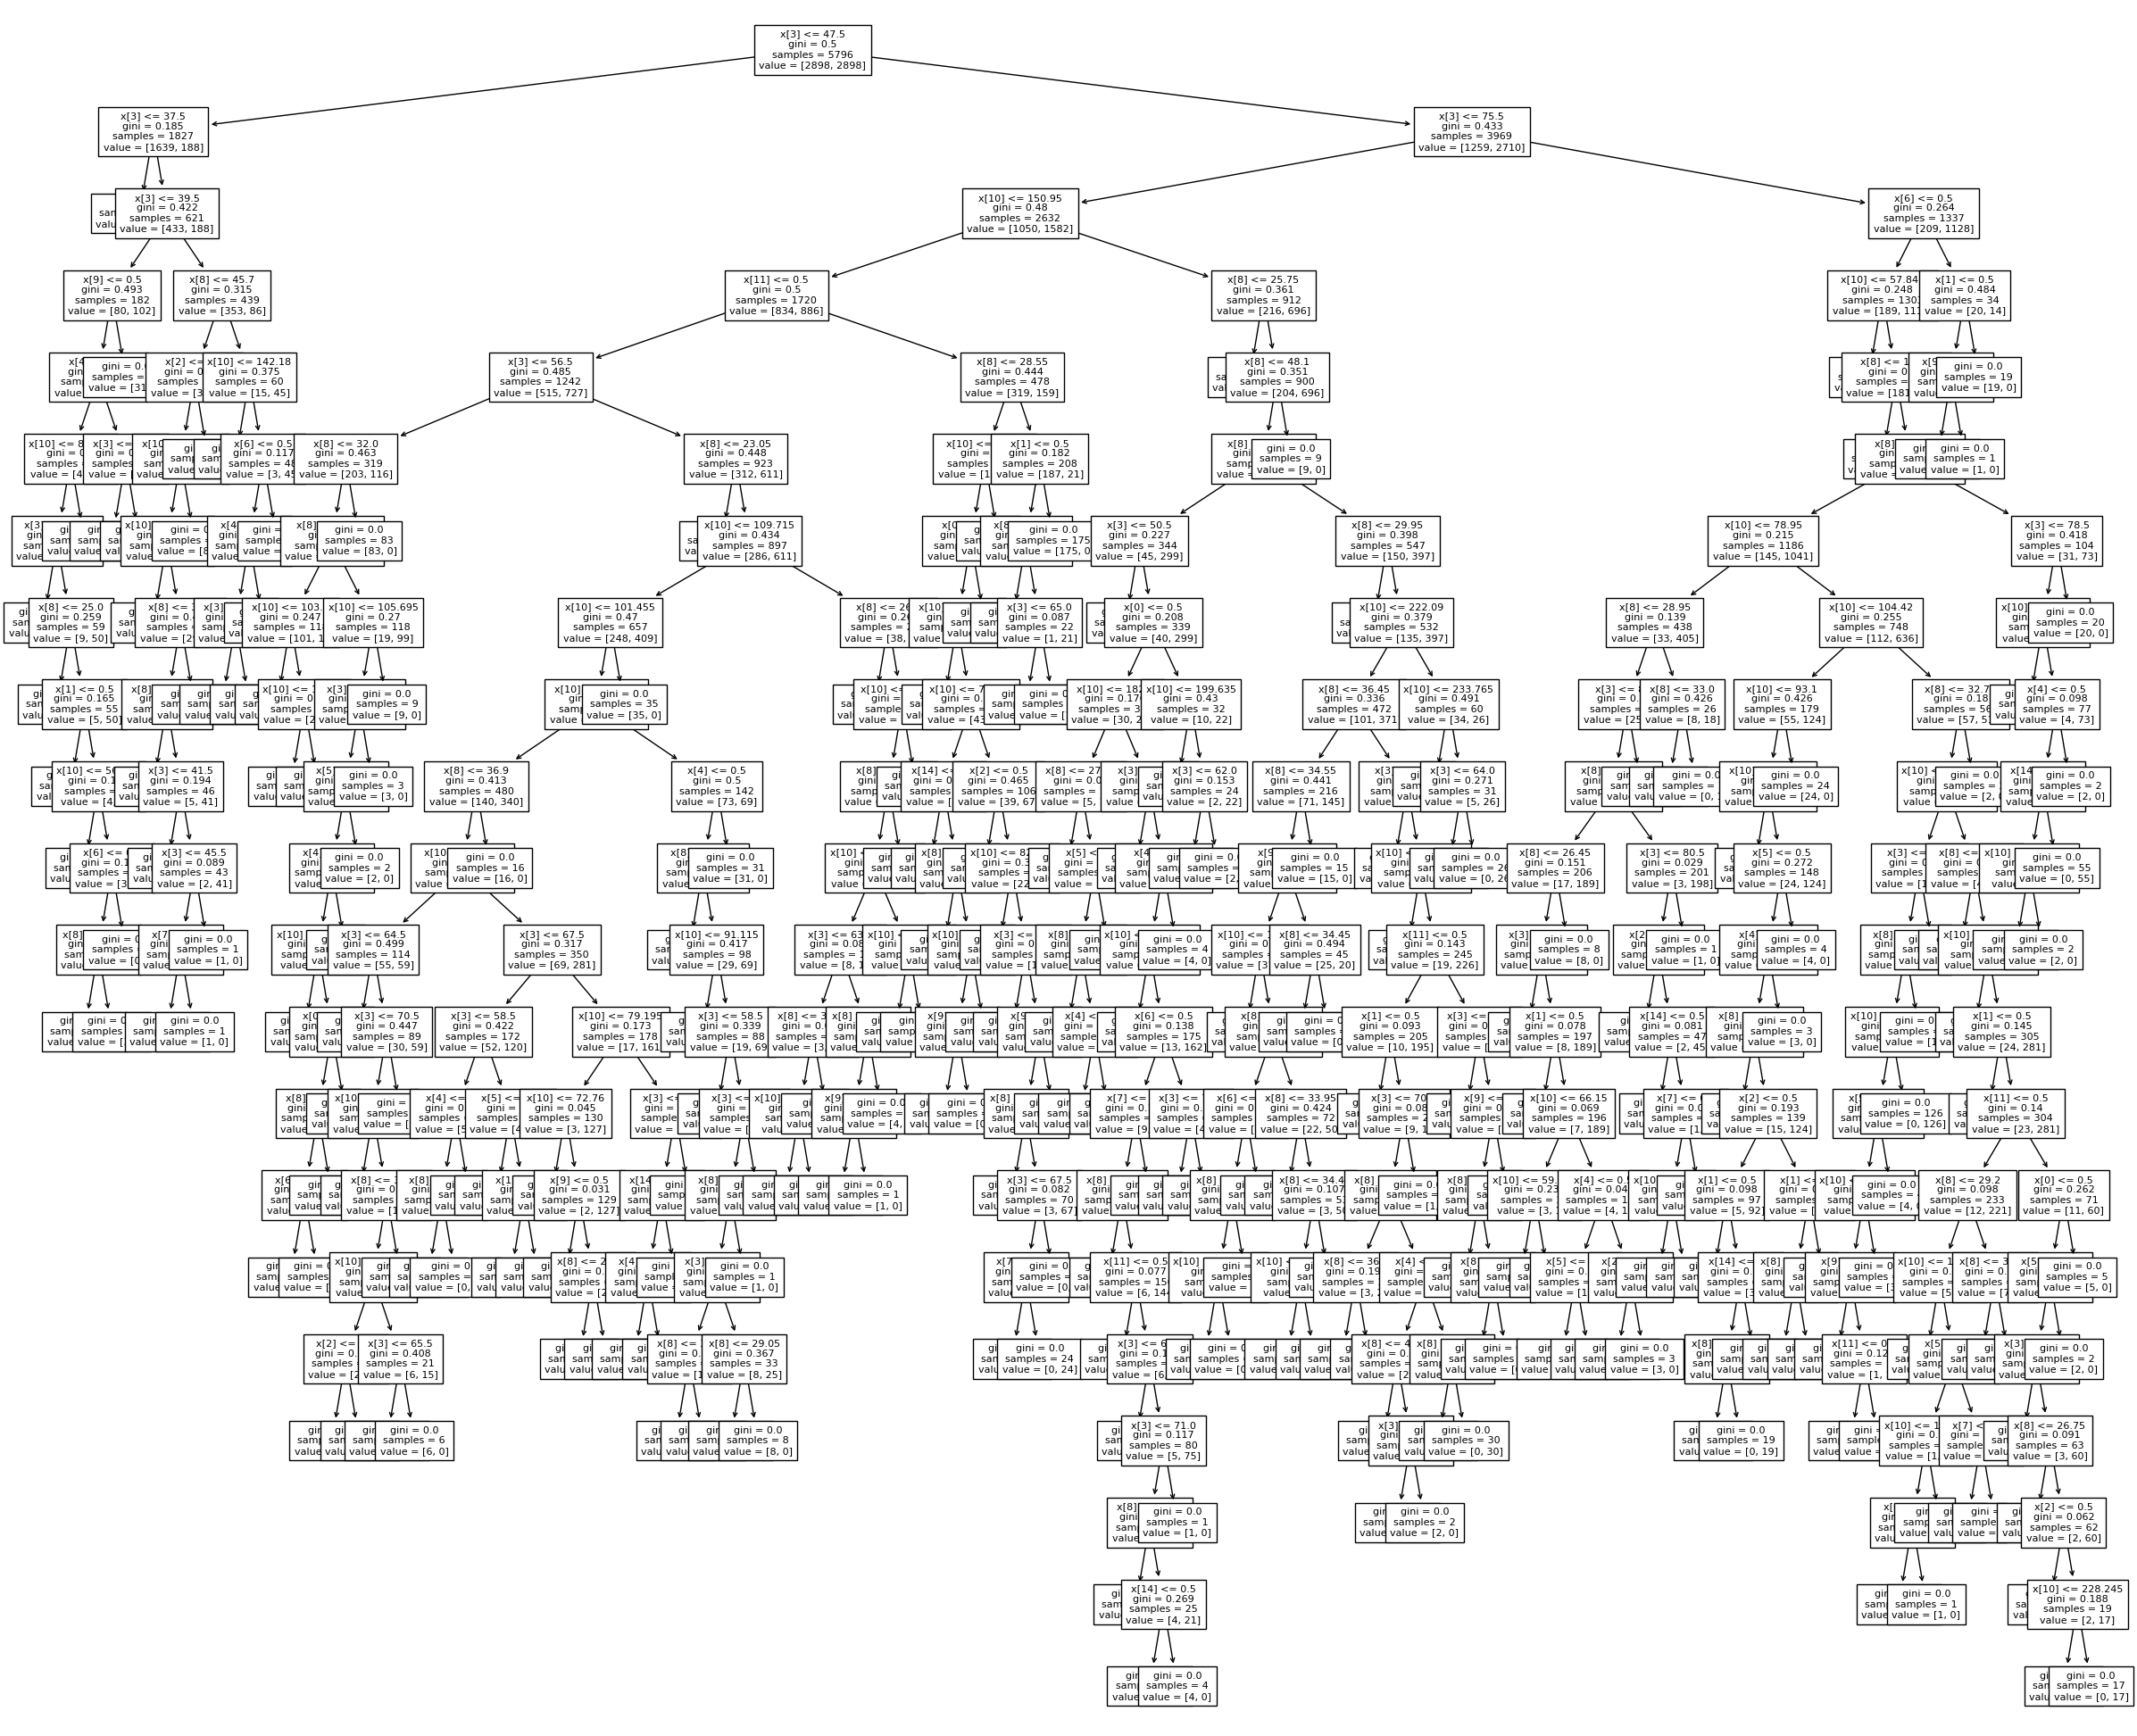

In [48]:
#Crea una instancia de la clase DecisionTreeClassifier. 
fullClassTree = DecisionTreeClassifier()
# Entrena el modelo de árbol de decisión en los datos de entrenamiento remuestreados.
fullClassTree.fit(X_train_resampled_ro, y_train_resampled_ro)

# Crea una nueva figura con un tamaño especificado de 30x25 pulgadas.
plt.figure(figsize=(30,25)) 
# Representa el árbol de decisión en la figura creada en el paso anterior con el tamaño de fuente especificado de 8.
tree.plot_tree(fullClassTree, fontsize=8)

#Se guarda el gráfico como un archivo de imagen llamado 'árbol' con una resolución de 100 dpi.
plt.savefig('tree', dpi=100)
plt.show()

Decidimos probar con Random Under Sampler para estar seguros

In [49]:
# El parámetro random_state se utiliza para controlar el generador de números aleatorios y garantiza que se obtengan los mismos resultados cada vez que se ejecuta el código.
clf = DecisionTreeClassifier(random_state=42)

# El clasificador utilizando los datos de entrenamiento remuestreados X_train_resampled_ru y las etiquetas objetivo correspondientes y_train_resampled_ru.
clf.fit(X_train_resampled_ru, y_train_resampled_ru)

#Utiliza el clasificador entrenado para hacer predicciones sobre los datos de prueba X_test, y almacena las etiquetas de clase predichas en la variable y_pred.
y_pred = clf.predict(X_test)

# Calcule la puntuación de precisión del modelo comparando las etiquetas predichas y_pred con las etiquetas verdaderas y_test
accuracy = accuracy_score(y_test, y_pred)
print("La precisión del modelo es:", accuracy)

La precisión del modelo es: 0.7524752475247525


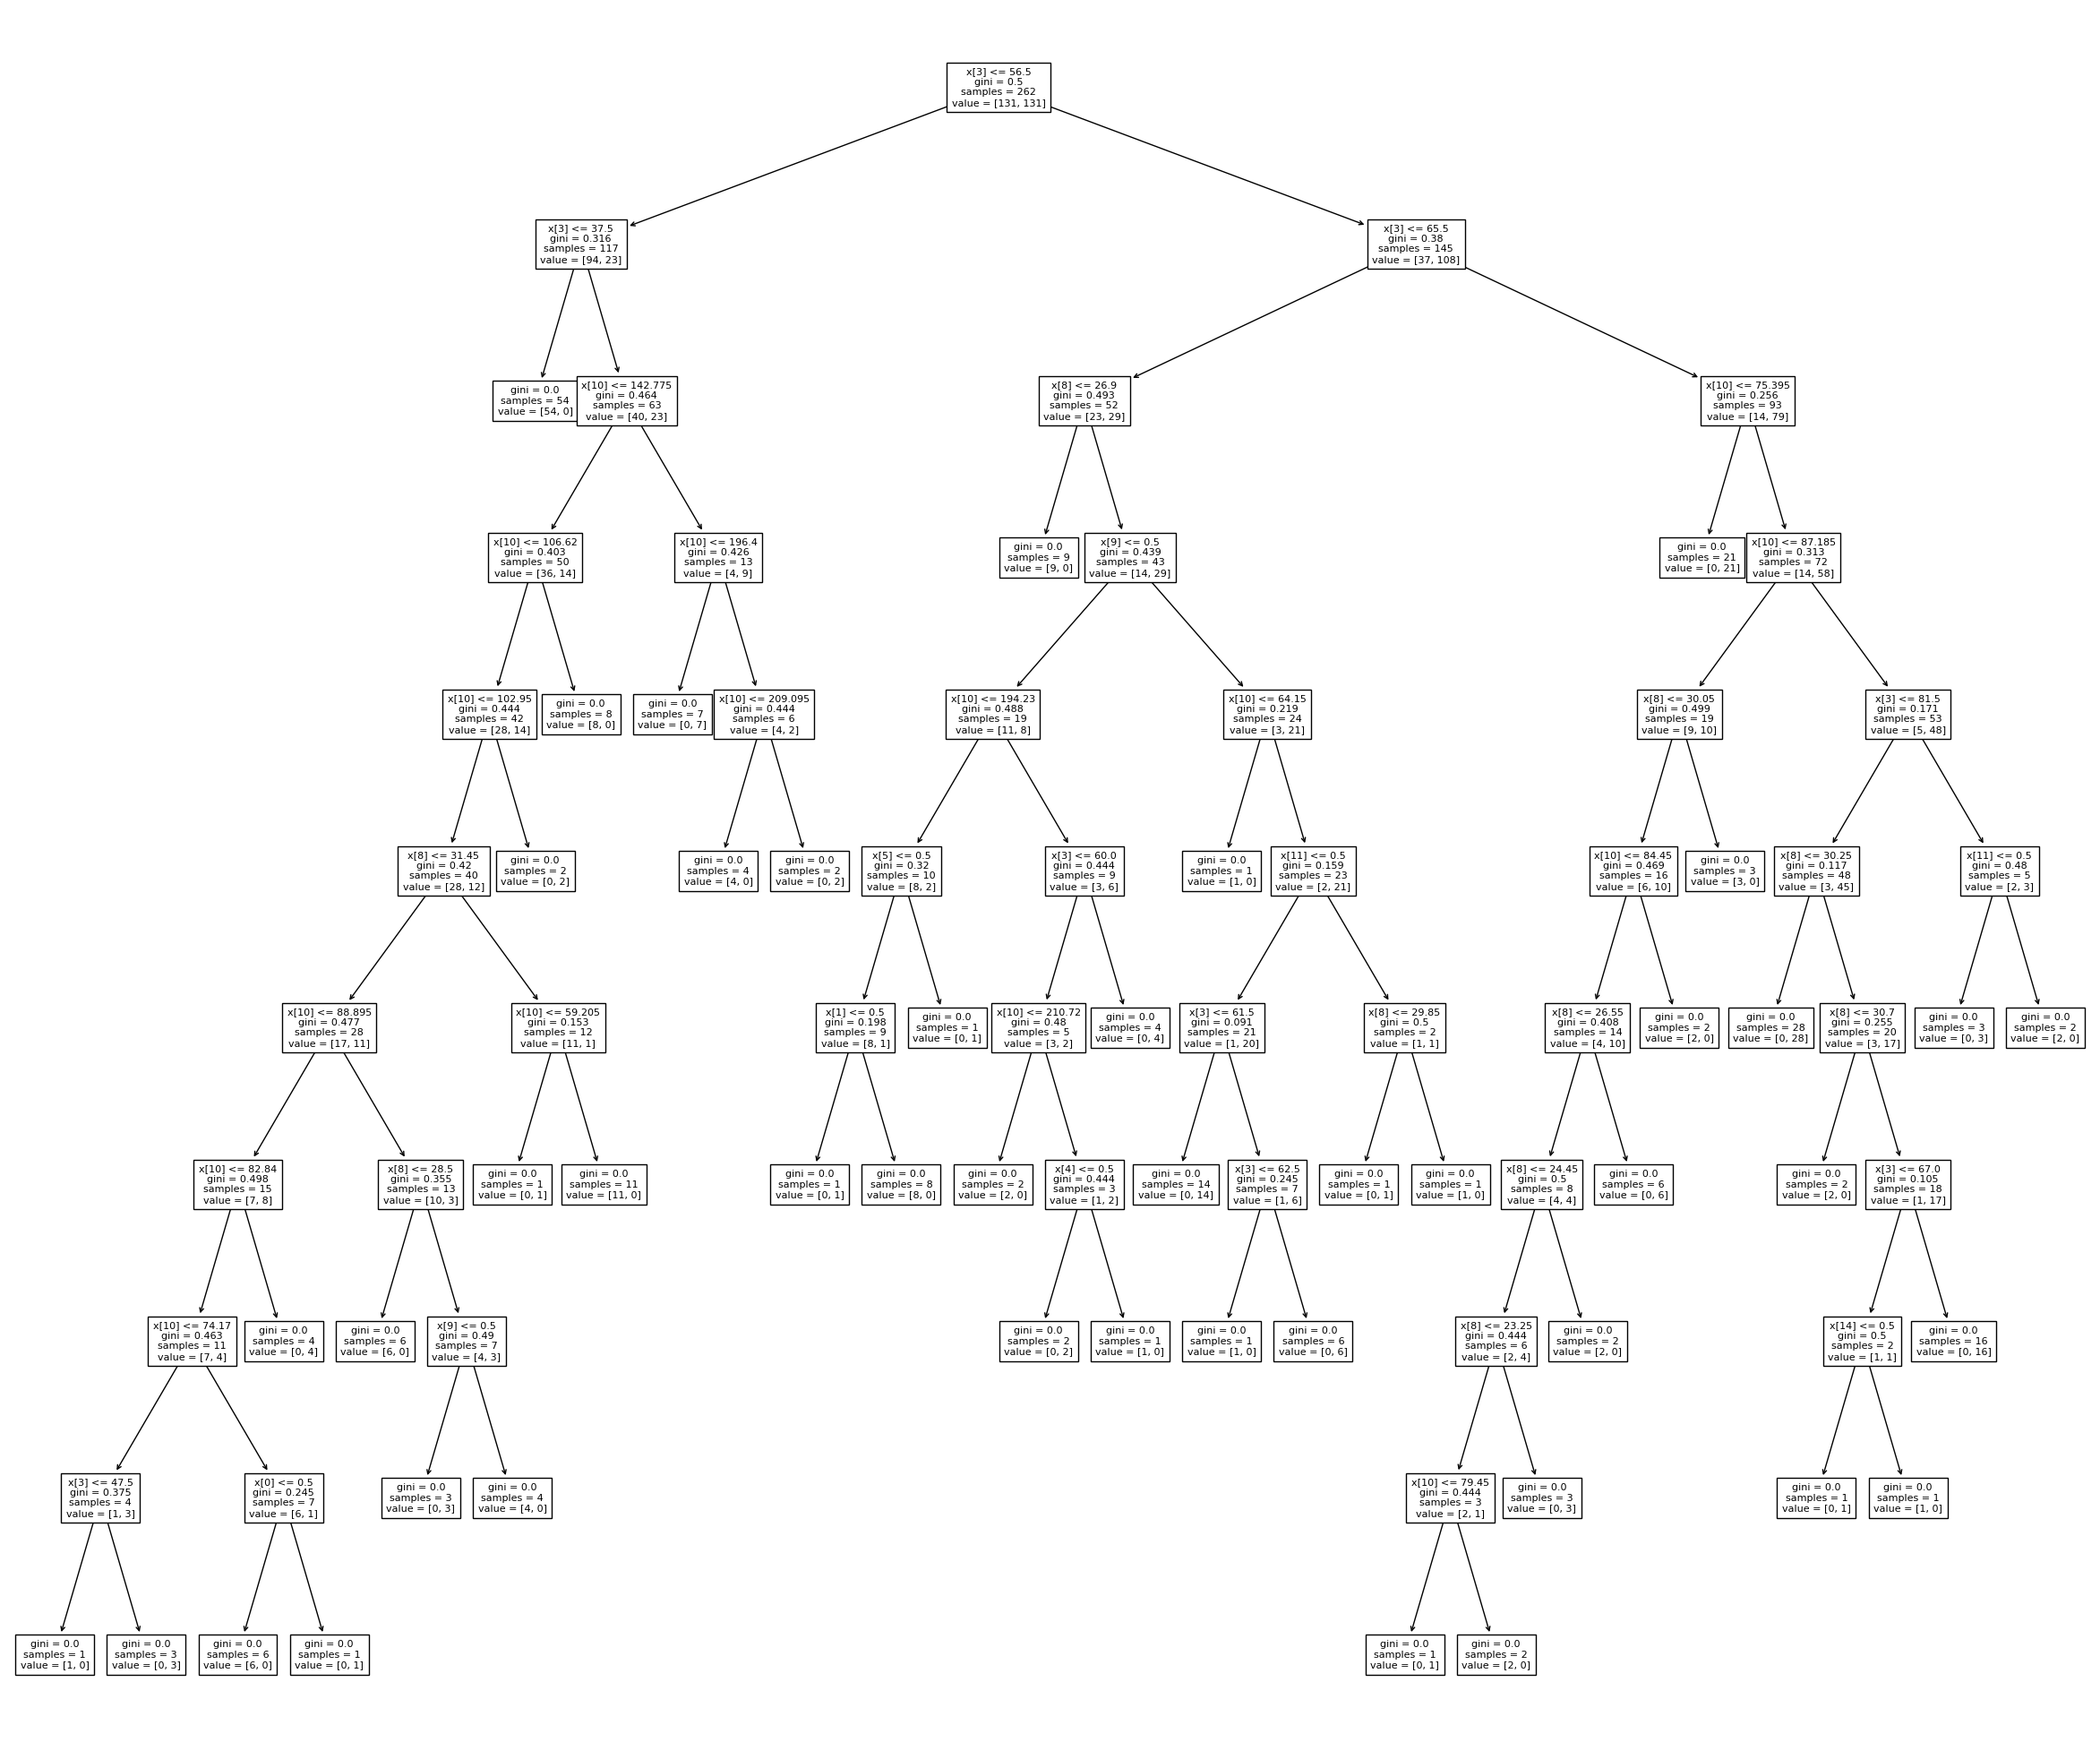

In [50]:
#Crea una instancia de la clase DecisionTreeClassifier. 
fullClassTree = DecisionTreeClassifier()
# Entrena el modelo de árbol de decisión en los datos de entrenamiento remuestreados.
fullClassTree.fit(X_train_resampled_ru, y_train_resampled_ru)

# Crea una nueva figura con un tamaño especificado de 30x25 pulgadas.
plt.figure(figsize=(30,25)) 
# Representa el árbol de decisión en la figura creada en el paso anterior con el tamaño de fuente especificado de 8.
tree.plot_tree(fullClassTree, fontsize=8)

#Se guarda el gráfico como un archivo de imagen llamado 'árbol' con una resolución de 100 dpi.
plt.savefig('tree', dpi=100)
plt.show()

https://github.com/Eligijus112/decision-tree-python 
https://gist.github.com/pb111/af439e4affb1dd94879579cfd6793770 
https://github.com/igrigorik/decisiontree 


5.2 Al menos 1 algoritmo debe ser un modelo no visto en clase (debe investigar y entender cómo funciona el modelo y como realiza la predicción, incluya está descripción en la presentación).

Gradient boosting

In [51]:
# Este código importa los módulos necesarios de la biblioteca scikit-learn para la clasificación Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [52]:
#Esta línea crea una nueva instancia de la clase GradientBoostingClassifier con un estado aleatorio establecido en 0. 
gb = GradientBoostingClassifier(random_state=0)

# Esta línea entrena el clasificador Gradient Boosting en los datos de entrenamiento remuestreados X_train_resampled_ro y y_train_resampled_ro. El método fit() ajusta los parámetros del modelo para minimizar la pérdida del conjunto de entrenamiento.
gb.fit(X_train_resampled_ro, y_train_resampled_ro)

# Esta línea evalúa la precisión del modelo entrenado en los datos de prueba X_prueba e y_prueba. El método score() calcula la precisión media de las predicciones realizadas por el modelo en los datos de prueba.
score = gb.score(X_test, y_test)

# Esta línea muestra la precisión del modelo entrenado en los datos de prueba. La precisión se muestra como un número de coma flotante con dos decimales.
print("The Accuracy is: {:.2f}".format(score))

The Accuracy is: 0.85


https://github.com/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn 
https://github.com/slundberg/shap 
https://github.com/stanfordmlgroup/ngboost 
 


5.3 Para al menos 2 algoritmos utilice un método de optimización de hiperparámetros. 

Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Crear una instancia del clasificador Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Definir los hiperparámetros a optimizar en la búsqueda de hiperparámetros utilizando RandomizedSearchCV.
param_dist = {"max_depth": [3, None],
              "max_features": np.arange(1, len(X_train_resampled_ro.columns)),
              "min_samples_split": np.arange(2, 11),
              "min_samples_leaf": np.arange(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [50, 100, 200],
              "criterion": ["gini", "entropy"]}

# Realizar la búsqueda de hiperparámetros con validación cruzada utilizando RandomizedSearchCV.
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5, n_iter=100, n_jobs=-1, random_state=0)
rf_random.fit(X_train_resampled_ro, y_train_resampled_ro)

# Obtener el mejor modelo Random Forest entrenado con los mejores hiperparámetros encontrados.
best_rf = rf_random.best_estimator_

# Evaluar la precisión del modelo Random Forest entrenado en los datos de prueba X_test e y_test.
score = best_rf.score(X_test, y_test)

# Mostrar la precisión del modelo Random Forest entrenado en los datos de prueba.
print("The Accuracy is: {:.2f}".format(score))


The Accuracy is: 0.94


https://gist.github.com/pb111/88545fa33780928694388779af23bf58 
https://github.com/ireis/PRF 
https://github.com/mahesh147/Random-Forest-Classifier 


Support Vector Machines (SVM)

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Esta línea crea una nueva instancia de la clase SVC con un estado aleatorio establecido en 0.
svm = SVC(random_state=0)

# Esta línea define los hiperparámetros a optimizar en la búsqueda de hiperparámetros utilizando GridSearchCV.
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Esta línea realiza la búsqueda de hiperparámetros con validación cruzada utilizando GridSearchCV.
svm_grid = GridSearchCV(svm, param_grid=param_grid, cv=5)
svm_grid.fit(X_train_resampled_ro, y_train_resampled_ro)

# Esta línea obtiene el mejor modelo SVM entrenado con los mejores hiperparámetros encontrados.
best_svm = svm_grid.best_estimator_

# Esta línea evalúa la precisión del modelo SVM entrenado en los datos de prueba X_prueba e y_prueba.
score = best_svm.score(X_test, y_test)

# Esta línea muestra la precisión del modelo SVM entrenado en los datos de prueba.
print("The Accuracy is: {:.2f}".format(score))


The Accuracy is: 0.75


https://gist.github.com/pb111/ca4680d8960c46aeb1b824a93a079fa7 
https://github.com/mahesh147/Support-Vector-Machine 
https://github.com/DrIanGregory/MachineLearning-SupportVectorMachines 


5.4 Para los hiperparamétros no optimizados de todos los modelos, justifique su valor (lea paperso libros que provea recomendaciones de valores e incluya como referencia en su reporte).


Árbol de decision: 

En este algorítmo, el único hiperparámetro que se establece es el "random_state=42". Este hiperparámetro controla el generador de números aleatorios utilizado en el modelo y se establece en un valor fijo de 42, el cual es un valor comúnmente utilizado como semilla para el generador de números aleatorios en Python. Se garantiza que el modelo se entrenará y evaluará de la misma manera en diferentes ejecuciones del código. En este caso, el valor de 42 se eligió de forma arbitraria, pero podría haber sido cualquier otro número entero. 

Según Müller y Guido (2016), la elección del número aleatorio en sí no es tan importante como elegir el mismo número aleatorio en ejecuciones futuras. Lo que significa que lo más importante es que el mismo valor de "random_state" se utilice en todas las ejecuciones para garantizar resultados consistentes y comparables. En el libro, se usa "42" como ejemplo para los árboles de decisión. El uso de "random_state" en los modelos de árbol de decisión en este libro es para garantizar la reproducibilidad y comparabilidad de los resultados (Müller y Guido, 2016, p.303).

Gradient Boosting

En este caso, el hiperparámetro "random_state" se establece en 0 para garantizar la reproducibilidad y comparabilidad de los resultados del modelo en diferentes ejecuciones. Según Müller y Guido (2016), este valor se ha elegido para facilitar la comparación de resultados entre modelos en el libro, pero en general, el valor de "random_state" puede variar según el problema y el conjunto de datos en cuestión. En cualquier caso, el uso de un valor fijo para "random_state" es importante para garantizar que los resultados del modelo sean consistentes en diferentes ejecuciones y para facilitar la evaluación y comparación de diferentes modelos (p. 95).

### 6. Evalué cada modelo

6.1 Calcule la matriz de confusión, exactitud, sensibilidad, especificidad, precisión, AUC y curva ROC para cada algoritmo en el set de entrenamiento, validación y prueba

Arbol de decision

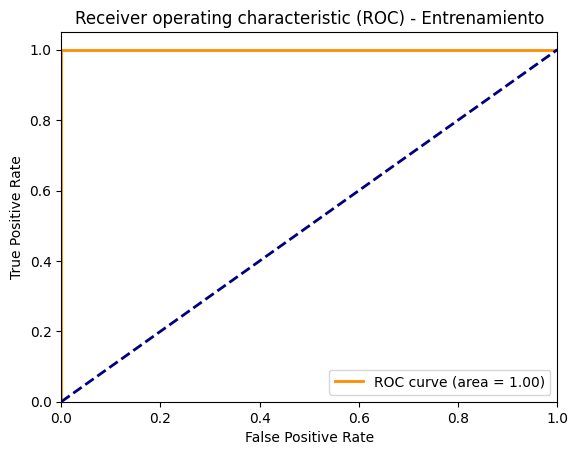

Métricas en el conjunto de entrenamiento:
Matriz de confusión:


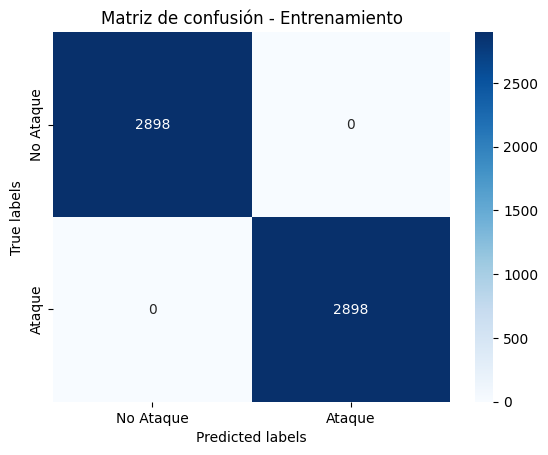

[[2898    0]
 [   0 2898]]
Exactitud: 1.0
Sensibilidad (Recall): 1.0
Especificidad: 1.0
Precisión: 1.0
Puntuación F1: 1.0
AUC: 1.0


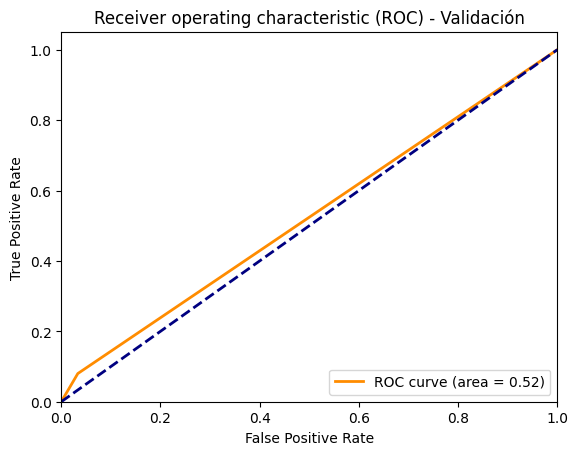


Métricas en el conjunto de validación:
Matriz de confusión:


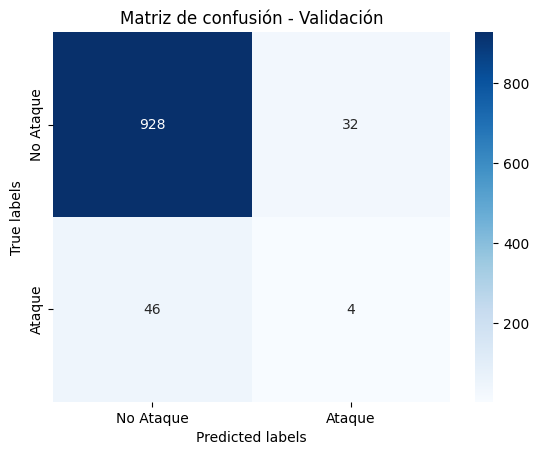

[[928  32]
 [ 46   4]]
Exactitud: 0.9227722772277228
Sensibilidad (Recall): 0.08
Especificidad: 0.9666666666666667
Precisión: 0.1111111111111111
Puntuación F1: 0.09302325581395349
AUC: 0.5233333333333333


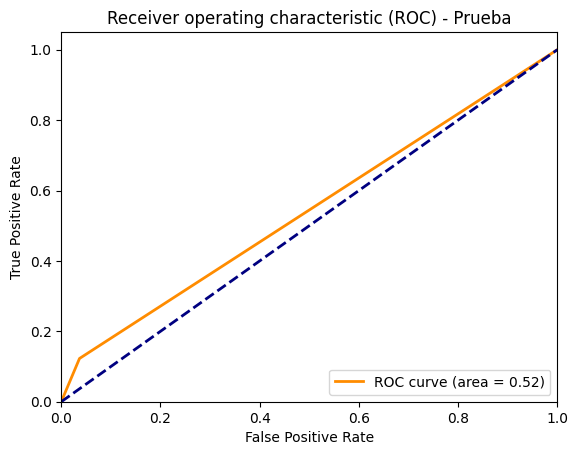


Métricas en el conjunto de prueba:
Matriz de confusión:


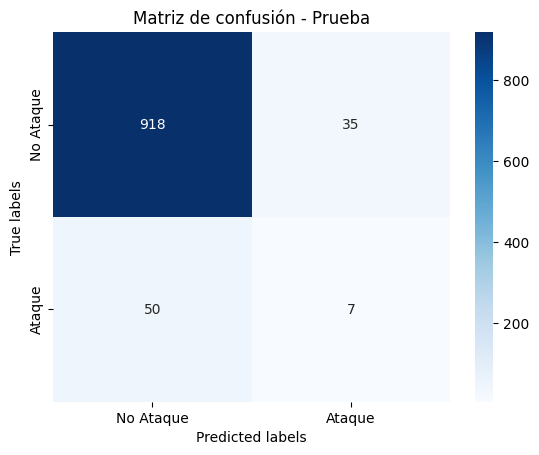

[[918  35]
 [ 50   7]]
Exactitud: 0.9158415841584159
Sensibilidad (Recall): 0.12280701754385964
Especificidad: 0.9632738719832109
Precisión: 0.16666666666666666
Puntuación F1: 0.1414141414141414
AUC: 0.5430404447635353


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# Definir modelo y ajustar a datos de entrenamiento
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled_ro, y_train_resampled_ro)

# Entrenamiento
y_train_pred = clf.predict(X_train_resampled_ro)
train_acc = accuracy_score(y_train_resampled_ro, y_train_pred)
train_prec = precision_score(y_train_resampled_ro, y_train_pred)
train_rec = recall_score(y_train_resampled_ro, y_train_pred)
train_spec = recall_score(y_train_resampled_ro, y_train_pred, pos_label=0)
train_f1 = f1_score(y_train_resampled_ro, y_train_pred)
train_auc = roc_auc_score(y_train_resampled_ro, y_train_pred)
train_fpr, train_tpr, _ = roc_curve(y_train_resampled_ro, y_train_pred)

plt.figure()
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Entrenamiento')
plt.legend(loc="lower right")
plt.show()

print("Métricas en el conjunto de entrenamiento:")
print("Matriz de confusión:")
cm_train = confusion_matrix(y_train_resampled_ro, y_train_pred)
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Entrenamiento')
plt.show()
print(confusion_matrix(y_train_resampled_ro, y_train_pred))
print("Exactitud:", train_acc)
print("Sensibilidad (Recall):", train_rec) 
print("Especificidad:", train_spec)
print("Precisión:", train_prec)
print("Puntuación F1:", train_f1)
print("AUC:", train_auc)

# Validación
y_val_pred = clf.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_spec = recall_score(y_val, y_val_pred, pos_label=0)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_pred)
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred)

plt.figure()
lw = 2
plt.plot(val_fpr, val_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % val_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Validación')
plt.legend(loc="lower right")
plt.show()

print("\nMétricas en el conjunto de validación:")
print("Matriz de confusión:")
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Validación')
plt.show()
print(confusion_matrix(y_val, y_val_pred))
print("Exactitud:", val_acc)
print("Sensibilidad (Recall):", val_rec)
print("Especificidad:", val_spec)
print("Precisión:", val_prec)
print("Puntuación F1:", val_f1)
print("AUC:", val_auc)

# Prueba
y_test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_spec = recall_score(y_test, y_test_pred, pos_label=0)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred)

plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % val_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Prueba')
plt.legend(loc="lower right")
plt.show() 

print("\nMétricas en el conjunto de prueba:")
print("Matriz de confusión:")
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Prueba')
plt.show()
print(confusion_matrix(y_test, y_test_pred))
print("Exactitud:", test_acc)
print("Sensibilidad (Recall):", test_rec)
print("Especificidad:", test_spec)
print("Precisión:", test_prec)
print("Puntuación F1:", test_f1)
print("AUC:", test_auc)


https://github.com/dell-datascience/Applied-Machine-Learning-in-Python 
https://github.com/queirozfcom/python-sandbox/blob/master/python3/notebooks/visualizing-machine-learning-models-post/confusion-matrix.ipynb 
https://gist.github.com/debonx/5a5a3f86f309abcf9a5b4236834c36e0 


Gradient boosting

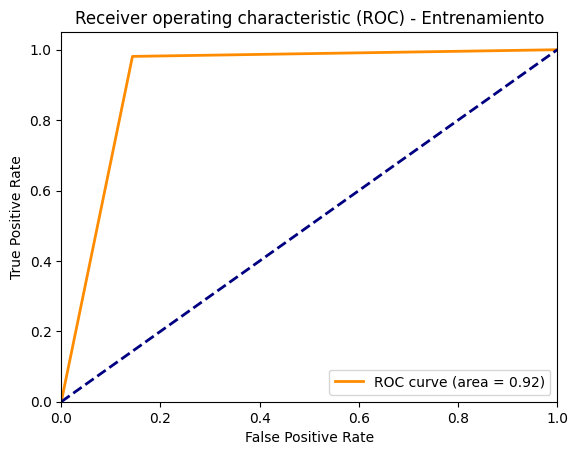

Métricas en el conjunto de entrenamiento:
Matriz de confusión:


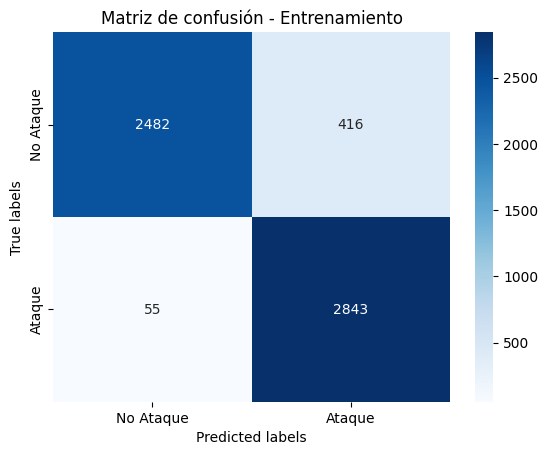

[[2482  416]
 [  55 2843]]
Exactitud: 0.9187370600414079
Sensibilidad (Recall): 0.9810213940648723
Especificidad: 0.8564527260179434
Precisión: 0.8723534826633936
Puntuación F1: 0.9235017053759947
AUC: 0.9187370600414079


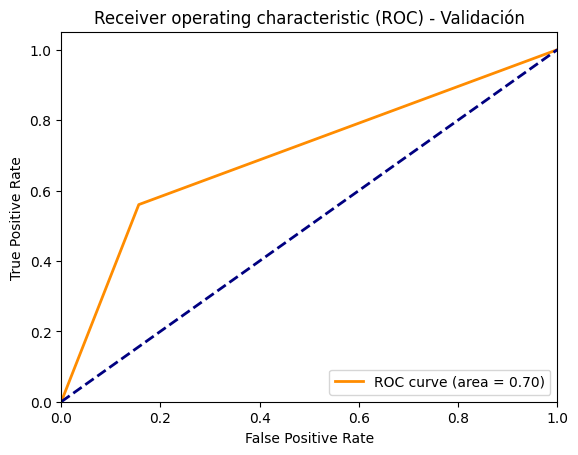


Métricas en el conjunto de validación:
Matriz de confusión:


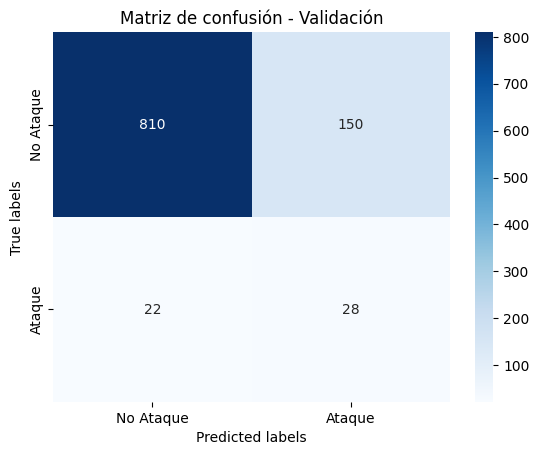

[[810 150]
 [ 22  28]]
Exactitud: 0.8297029702970297
Sensibilidad (Recall): 0.56
Especificidad: 0.84375
Precisión: 0.15730337078651685
Puntuación F1: 0.24561403508771934
AUC: 0.701875


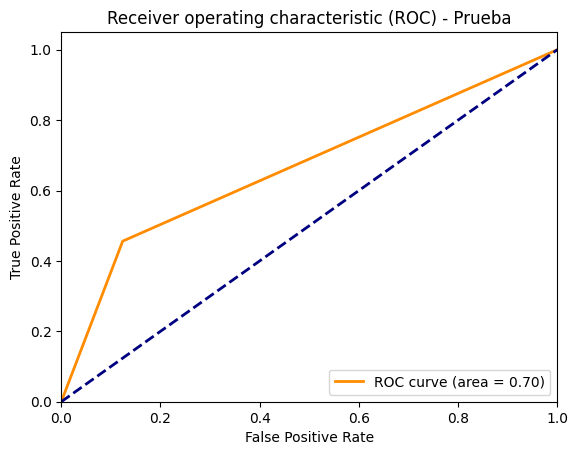


Métricas en el conjunto de prueba:
Matriz de confusión:


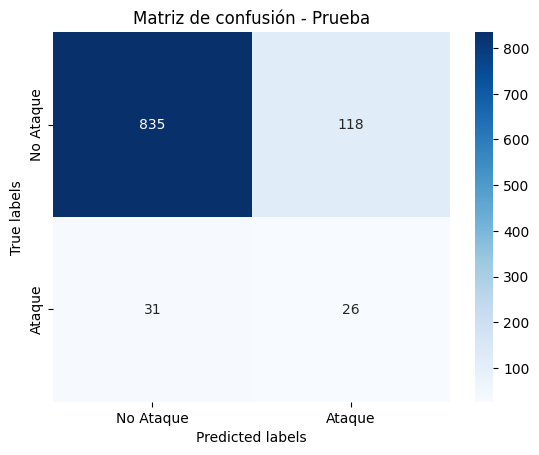

[[835 118]
 [ 31  26]]
Exactitud: 0.8524752475247525
Sensibilidad (Recall): 0.45614035087719296
Especificidad: 0.8761804826862539
Precisión: 0.18055555555555555
Puntuación F1: 0.25870646766169153
AUC: 0.6661604167817234


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Definir modelo y ajustar a datos de entrenamiento
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(X_train_resampled_ro, y_train_resampled_ro)

# Entrenamiento
y_train_pred = gbm.predict(X_train_resampled_ro)
train_acc = accuracy_score(y_train_resampled_ro, y_train_pred)
train_prec = precision_score(y_train_resampled_ro, y_train_pred)
train_rec = recall_score(y_train_resampled_ro, y_train_pred)
train_spec = recall_score(y_train_resampled_ro, y_train_pred, pos_label=0)
train_f1 = f1_score(y_train_resampled_ro, y_train_pred)
train_auc = roc_auc_score(y_train_resampled_ro, y_train_pred)
train_fpr, train_tpr, _ = roc_curve(y_train_resampled_ro, y_train_pred)

plt.figure()
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Entrenamiento')
plt.legend(loc="lower right")
plt.show()

print("Métricas en el conjunto de entrenamiento:")
print("Matriz de confusión:")
cm_train = confusion_matrix(y_train_resampled_ro, y_train_pred)
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Entrenamiento')
plt.show()
print(confusion_matrix(y_train_resampled_ro, y_train_pred))
print("Exactitud:", train_acc)
print("Sensibilidad (Recall):", train_rec) 
print("Especificidad:", train_spec)
print("Precisión:", train_prec)
print("Puntuación F1:", train_f1)
print("AUC:", train_auc)


# Validación
y_val_pred = gbm.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_spec = recall_score(y_val, y_val_pred, pos_label=0)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_pred)
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred)

plt.figure()
lw = 2
plt.plot(val_fpr, val_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % val_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Validación')
plt.legend(loc="lower right")
plt.show()

print("\nMétricas en el conjunto de validación:")
print("Matriz de confusión:")
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Validación')
plt.show()
print(confusion_matrix(y_val, y_val_pred))
print("Exactitud:", val_acc)
print("Sensibilidad (Recall):", val_rec)
print("Especificidad:", val_spec)
print("Precisión:", val_prec)
print("Puntuación F1:", val_f1)
print("AUC:", val_auc)

# Prueba
y_test_pred = gbm.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_spec = recall_score(y_test, y_test_pred, pos_label=0)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred)

plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % val_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Prueba')
plt.legend(loc="lower right")
plt.show()

print("\nMétricas en el conjunto de prueba:")
print("Matriz de confusión:")
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Prueba')
plt.show()
print(confusion_matrix(y_test, y_test_pred))
print("Exactitud:", test_acc)
print("Sensibilidad (Recall):", test_rec)
print("Especificidad:", test_spec)
print("Precisión:", test_prec)
print("Puntuación F1:", test_f1)
print("AUC:", test_auc)



https://github.com/dell-datascience/Applied-Machine-Learning-in-Python 
https://github.com/queirozfcom/python-sandbox/blob/master/python3/notebooks/visualizing-machine-learning-models-post/confusion-matrix.ipynb 
https://gist.github.com/debonx/5a5a3f86f309abcf9a5b4236834c36e0 


random forest

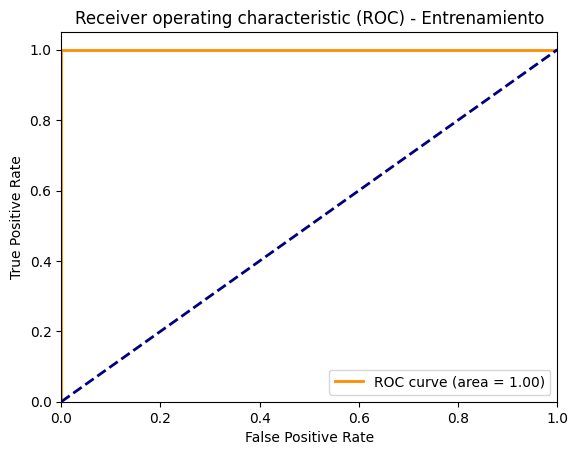

Métricas en el conjunto de entrenamiento:
Matriz de confusión:


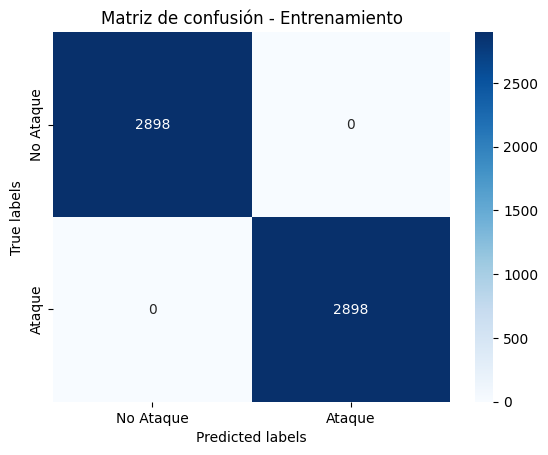

[[2898    0]
 [   0 2898]]
Exactitud: 1.0
Sensibilidad (Recall): 1.0
Especificidad: 1.0
Precisión: 1.0
Puntuación F1: 1.0
AUC: 1.0


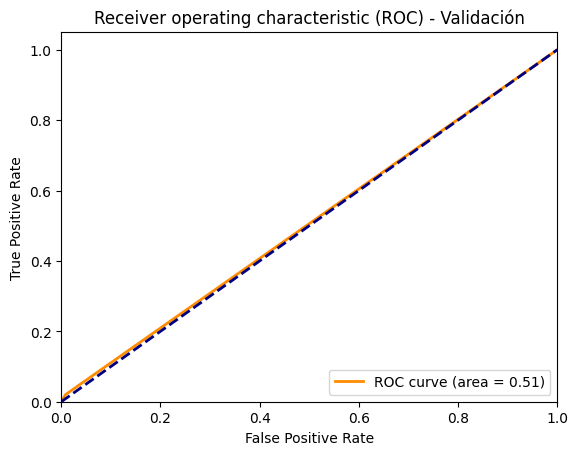


Métricas en el conjunto de validación:
Matriz de confusión:


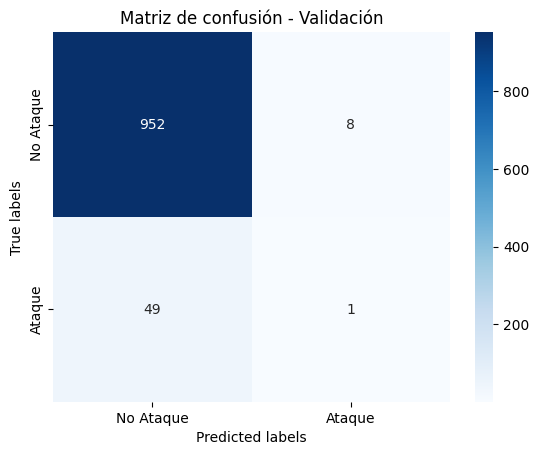

[[952   8]
 [ 49   1]]
Exactitud: 0.9435643564356435
Sensibilidad (Recall): 0.02
Especificidad: 0.9916666666666667
Precisión: 0.1111111111111111
Puntuación F1: 0.03389830508474577
AUC: 0.5058333333333334


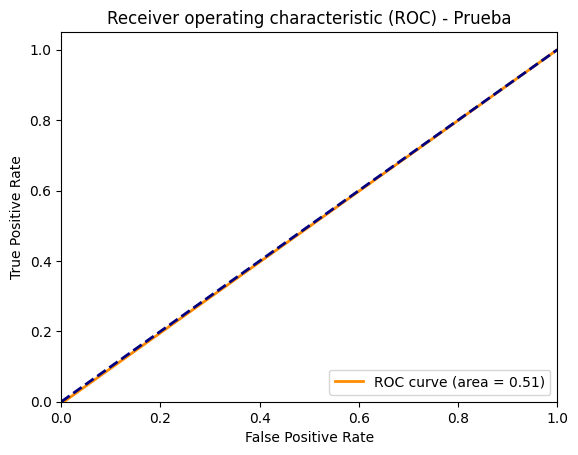


Métricas en el conjunto de prueba:
Matriz de confusión:


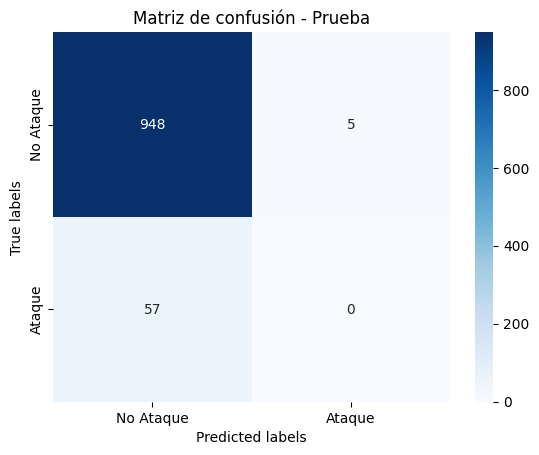

[[948   5]
 [ 57   0]]
Exactitud: 0.9386138613861386
Sensibilidad (Recall): 0.0
Especificidad: 0.9947534102833159
Precisión: 0.0
Puntuación F1: 0.0
AUC: 0.49737670514165794


In [57]:

# Definir modelo y ajustar a datos de entrenamiento
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train_resampled_ro, y_train_resampled_ro)

# Entrenamiento
y_train_pred = rfc.predict(X_train_resampled_ro)
train_acc = accuracy_score(y_train_resampled_ro, y_train_pred)
train_prec = precision_score(y_train_resampled_ro, y_train_pred)
train_rec = recall_score(y_train_resampled_ro, y_train_pred)
train_spec = recall_score(y_train_resampled_ro, y_train_pred, pos_label=0)
train_f1 = f1_score(y_train_resampled_ro, y_train_pred)
train_auc = roc_auc_score(y_train_resampled_ro, y_train_pred)
train_fpr, train_tpr, _ = roc_curve(y_train_resampled_ro, y_train_pred)

plt.figure()
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Entrenamiento')
plt.legend(loc="lower right")
plt.show()

print("Métricas en el conjunto de entrenamiento:")
print("Matriz de confusión:")
cm_train = confusion_matrix(y_train_resampled_ro, y_train_pred)
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Entrenamiento')
plt.show()
print(confusion_matrix(y_train_resampled_ro, y_train_pred))
print("Exactitud:", train_acc)
print("Sensibilidad (Recall):", train_rec) 
print("Especificidad:", train_spec)
print("Precisión:", train_prec)
print("Puntuación F1:", train_f1)
print("AUC:", train_auc)


# Validación
y_val_pred = rfc.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_spec = recall_score(y_val, y_val_pred, pos_label=0)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_pred)
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred)

plt.figure()
lw = 2
plt.plot(val_fpr, val_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % val_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Validación')
plt.legend(loc="lower right")
plt.show()

print("\nMétricas en el conjunto de validación:")
print("Matriz de confusión:")
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Validación')
plt.show()
print(confusion_matrix(y_val, y_val_pred))
print("Exactitud:", val_acc)
print("Sensibilidad (Recall):", val_rec)
print("Especificidad:", val_spec)
print("Precisión:", val_prec)
print("Puntuación F1:", val_f1)
print("AUC:", val_auc)

# Prueba
y_test_pred = rfc.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_spec = recall_score(y_test, y_test_pred, pos_label=0)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred)

plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % val_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Prueba')
plt.legend(loc="lower right")
plt.show()

print("\nMétricas en el conjunto de prueba:")
print("Matriz de confusión:")
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Prueba')
plt.show()
print(confusion_matrix(y_test, y_test_pred))
print("Exactitud:", test_acc)
print("Sensibilidad (Recall):", test_rec)
print("Especificidad:", test_spec)
print("Precisión:", test_prec)
print("Puntuación F1:", test_f1)
print("AUC:", test_auc)


https://github.com/dell-datascience/Applied-Machine-Learning-in-Python 
https://github.com/queirozfcom/python-sandbox/blob/master/python3/notebooks/visualizing-machine-learning-models-post/confusion-matrix.ipynb 
https://gist.github.com/debonx/5a5a3f86f309abcf9a5b4236834c36e0
https://github.com/tolgakurtulus/Machine/blob/master/confusion-matrix-with-random-forest.py  


SVM

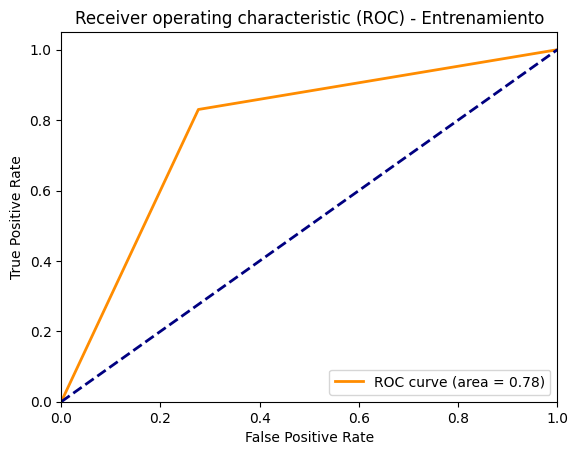

Métricas en el conjunto de entrenamiento:
Matriz de confusión:


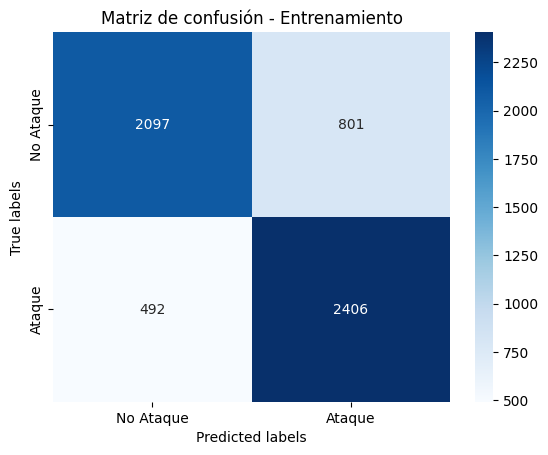

[[2097  801]
 [ 492 2406]]
Exactitud: 0.7769151138716356
Sensibilidad (Recall): 0.8302277432712215
Especificidad: 0.7236024844720497
Precisión: 0.7502338634237605
Puntuación F1: 0.7882063882063882
AUC: 0.7769151138716356


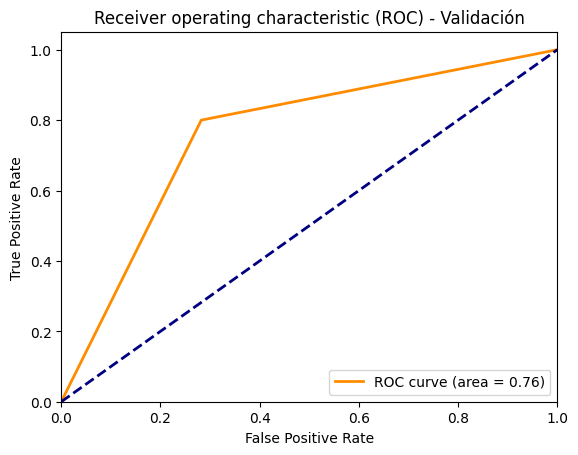


Métricas en el conjunto de validación:
Matriz de confusión:


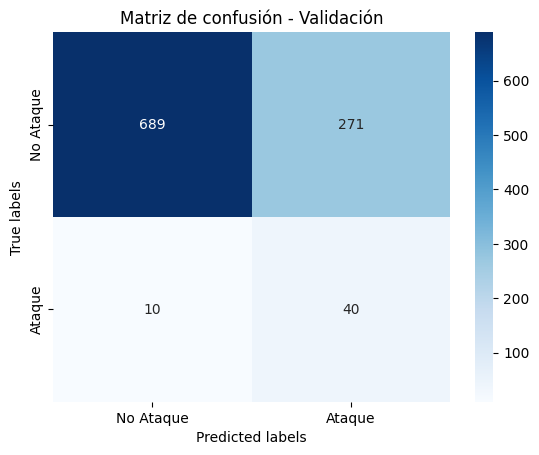

[[689 271]
 [ 10  40]]
Exactitud: 0.7217821782178218
Sensibilidad (Recall): 0.8
Especificidad: 0.7177083333333333
Precisión: 0.12861736334405144
Puntuación F1: 0.22160664819944595
AUC: 0.7588541666666667


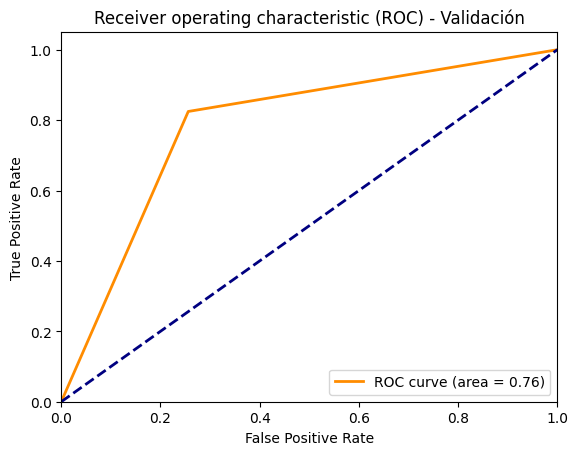


Métricas en el conjunto de validación:
Matriz de confusión:


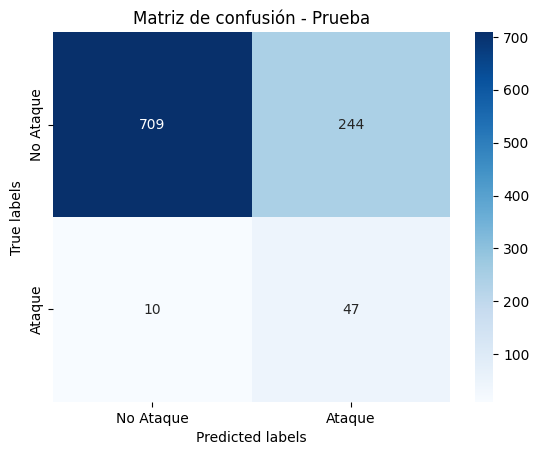

[[709 244]
 [ 10  47]]
Exactitud: 0.7485148514851485
Sensibilidad (Recall): 0.8245614035087719
Especificidad: 0.7439664218258132
Precisión: 0.16151202749140894
Puntuación F1: 0.2701149425287357
AUC: 0.7842639126672926


In [58]:
# Definir modelo y ajustar a datos de entrenamiento
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train_resampled_ro, y_train_resampled_ro)

# Entrenamiento
y_train_pred = svm.predict(X_train_resampled_ro)
train_acc = accuracy_score(y_train_resampled_ro, y_train_pred)
train_prec = precision_score(y_train_resampled_ro, y_train_pred)
train_rec = recall_score(y_train_resampled_ro, y_train_pred)
train_spec = recall_score(y_train_resampled_ro, y_train_pred, pos_label=0)
train_f1 = f1_score(y_train_resampled_ro, y_train_pred)
train_auc = roc_auc_score(y_train_resampled_ro, y_train_pred)
train_fpr, train_tpr, _ = roc_curve(y_train_resampled_ro, y_train_pred)

plt.figure()
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Entrenamiento')
plt.legend(loc="lower right")
plt.show()

print("Métricas en el conjunto de entrenamiento:")
print("Matriz de confusión:")
cm_train = confusion_matrix(y_train_resampled_ro, y_train_pred)
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Entrenamiento')
plt.show()
print(confusion_matrix(y_train_resampled_ro, y_train_pred))
print("Exactitud:", train_acc)
print("Sensibilidad (Recall):", train_rec) 
print("Especificidad:", train_spec)
print("Precisión:", train_prec)
print("Puntuación F1:", train_f1)
print("AUC:", train_auc)


# Validación
y_val_pred = svm.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
val_prec = precision_score(y_val, y_val_pred)
val_rec = recall_score(y_val, y_val_pred)
val_spec = recall_score(y_val, y_val_pred, pos_label=0)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_pred)
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred)

plt.figure()
lw = 2
plt.plot(val_fpr, val_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % val_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Validación')
plt.legend(loc="lower right")
plt.show()

print("\nMétricas en el conjunto de validación:")
print("Matriz de confusión:")
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Validación')
plt.show()
print(confusion_matrix(y_val, y_val_pred))
print("Exactitud:", val_acc)
print("Sensibilidad (Recall):", val_rec)
print("Especificidad:", val_spec)
print("Precisión:", val_prec)
print("Puntuación F1:", val_f1)
print("AUC:", val_auc)

# Prueba
y_test_pred = svm.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_spec = recall_score(y_test, y_test_pred, pos_label=0)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred)

plt.figure()
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % val_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - Validación')
plt.legend(loc="lower right")
plt.show()

print("\nMétricas en el conjunto de validación:")
print("Matriz de confusión:")
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de confusión - Prueba')
plt.show()
print(confusion_matrix(y_test, y_test_pred))
print("Exactitud:", test_acc)
print("Sensibilidad (Recall):", test_rec)
print("Especificidad:", test_spec)
print("Precisión:", test_prec)
print("Puntuación F1:", test_f1)
print("AUC:", test_auc)


https://github.com/dell-datascience/Applied-Machine-Learning-in-Python 
https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-create-a-confusion-matrix-with-scikit-learn.md 
https://github.com/queirozfcom/python-sandbox/blob/master/python3/notebooks/visualizing-machine-learning-models-post/confusion-matrix.ipynb 
https://gist.github.com/debonx/5a5a3f86f309abcf9a5b4236834c36e0 


6.2 Considerando los costos de los tipos de errores en este problema, seleccione y justifique la
métrica de evaluación más adecuada. 

Considerando el problema médico de la predicción del riesgo de un ataque cerebral, es importante señalar que un falso negativo puede ser más perjudicial que un falso positivo. Esto se debe a que es esencial detectar tempranamente el riesgo de ataque para evitar daños cerebrales catastróficos e incluso mortales. Los falsos negativos ocurren cuando el modelo no reconoce que el paciente está en peligro, lo que puede retrasar la terapia y empeorar los síntomas. Por otro lado, aunque un falso positivo puede generar gastos innecesarios y molestias, por lo general no tiene un impacto negativo significativo en la salud del paciente. 

En relación a la evaluación de los modelos de predicción, en el contexto de la predicción del riesgo de un ataque cerebral, las métricas más relevantes son la sensibilidad y la especificidad, en lugar de la exactitud, la precisión, el AUC o la curva ROC. La sensibilidad se refiere a la probabilidad de que una prueba arroje un resultado positivo si el paciente realmente padece la enfermedad. Los falsos negativos disminuyen a medida que aumenta la sensibilidad de la prueba. Por otro lado, la especificidad se refiere a la probabilidad de que la prueba arroje un resultado negativo si el paciente no padece la enfermedad. Los falsos positivos disminuyen a medida que aumenta la especificidad de la prueba. (Husney y Gabuca, 2022).

En consecuencia, es crucial que el modelo tenga una alta sensibilidad para minimizar los falsos negativos y asegurar que los pacientes en riesgo de sufrir un ataque cerebral sean identificados de manera precisa. Por lo tanto, la métrica más adecuada en este contexto es la sensibilidad.

6.3  Seleccione y justifique el mejor algoritmo en base a la métrica de evaluación escogida y su
desempeño en el set de entrenamiento, validación y prueba. 

Basado en las sensibilidades proporcionadas, el mejor algoritmo para este problema parece ser Support Vector Machines (SVM), ya que obtiene la sensibilidad más alta en el conjunto de prueba (0.82). Aunque la sensibilidad de SVM en el conjunto de validación es menor que la de Gradient Boosting, el hecho de que SVM tenga un mejor rendimiento en el conjunto de prueba sugiere que ha logrado aprender patrones más relevantes del conjunto de entrenamiento y ha evitado sobreajustar el modelo en el conjunto de validación. Por lo tanto, se espera que SVM tenga un mejor desempeño en situaciones del mundo real en comparación con Gradient Boosting, ya que ha logrado una mejor capacidad de generalización. También es importante destacar que SVM tiene una sensibilidad decente en el conjunto de entrenamiento (0.83), lo que sugiere que no está sobreajustando los datos de entrenamiento.

Mientras tanto, los otros algoritmos, como Árbol de decisión, Gradient Boosting y Random Forest, parecen estar sobreajustando los datos de entrenamiento, ya que obtienen una sensibilidad del 100% en el conjunto de entrenamiento pero su desempeño en los conjuntos de validación y prueba es significativamente peor. En particular, Random Forest parece estar sufriendo de un fuerte sobreajuste ya que su sensibilidad en el conjunto de prueba es 0.0, lo que sugiere que está teniendo problemas para generalizar a nuevos datos.

En conclsuión, SVM parece ser el mejor algoritmo para este problema, ya que obtiene la sensibilidad más alta en el conjunto de prueba y no parece estar sobreajustando los datos de entrenamiento.

6.4  Investigue como se puede utilizar un random ¿ forest para seleccionar las variables predictivas más importantes para la predicción. Utilizando este método, determine cuales son las variables  predictivas más importantes para predecir un ataque cerebral. En la presentación y reporte explique el método utilizado

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier()

# Entrenar el modelo con todas las variables predictivas
rf_model.fit(X_train_resampled_ro, y_train_resampled_ro)

# Calcular la importancia de las variables
importances = rf_model.feature_importances_

# Evaluar el rendimiento del clasificador en el conjunto de validación
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Crear una lista de tuplas que contienen la variable y su importancia
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]

# Ordenar la lista de variables por importancia
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Imprimir las variables y su importancia
# Imprimir las variables y su importancia
print("{:^30} {:^20}".format('VARIABLE', 'IMPORTANCIA'))
print("")
for feature in feature_importances:
    print("{:^30} {:^18}".format(feature[0], feature[1]))


# Seleccionar las variables más importantes
important_features = [feature[0] for feature in feature_importances if feature[1] > 0.1]

# Imprimir las variables y su importancia
# Definir el umbral para la importancia de la variable
umbral = 0.1

# Imprimir las variables y su importancia
print("")
print("{:^55}".format('VARIABLES MÁS IMPORTANTES'))
print("")
for feature in feature_importances:
    if feature[1] > 0.1: # establecer el umbral de importancia
        print("{:^30} {:^18}".format(feature[0], feature[1]))


           VARIABLE                IMPORTANCIA     

             EDAD                     0.36       
       NIVEL_DE_GLUCOSA               0.21       
             IMC                      0.18       
            CASADO                    0.05       
           CITADINO                   0.03       
         HIPERTENSION                 0.03       
          MASCULINO                   0.03       
           AUTONOMO                   0.02       
          EX_FUMADOR                  0.02       
        FALLA_CARDIACA                0.02       
             FUMA                     0.02       
          NUNCA_FUMO                  0.02       
       TRABAJO_PRIVADO                0.02       
       TRABAJO_INFANTIL               0.01       
        NUNCA_TRABAJO                 0.0        

               VARIABLES MÁS IMPORTANTES               

             EDAD                     0.36       
       NIVEL_DE_GLUCOSA               0.21       
             IMC                      0

https://github.com/andrewhetherington/python-projects/blob/master/Blog%E2%80%94Evaluating%20Classifier%20Model%20Performance/Evaluating%20Classifier%20Model%20Performance.ipynb 
https://gist.github.com/soumikghosal/5a663fd99af776af0c43d20b2fa48460 
https://github.com/sruti-jain/Machine-Learning---Python/blob/master/Classification%20Model%20Evaluation%20Metrics.ipynb 


### 7. Calcule el costo de implementación del modelo


7.1 Investigue como se calcula el costo de implementar un modelo de analítica de datos en una
empresa y calcule cuánto costaría implementar este modelo en un hospital. Considere los
costos de equipos (computadoras, subscripción a servicios de la nube), mantenimiento del
software, etc. Menciones las ventajas y desventajas de utilizar este método en un hospital.

El costo de implementar un modelo de analítica de datos en una empresa dependerá de varios factores, como los objetivos del modelo, las fuentes de datos, las herramientas de software, el equipo de análisis de datos y la infraestructura de hardware necesaria. En general, los costos de implementar un modelo de analítica de datos pueden ser significativos. Sin embargo, los beneficios potenciales de la analítica de datos, como la toma de decisiones basada en datos y la identificación de oportunidades de mejora, pueden justificar estos costos (Balboni, et al., 2013). Además, la implementación de un modelo de analítica de datos puede ser vista como una inversión a largo plazo en la empresa.

Ahora, en este caso se implementaría el modelo SVM y el precio de instalarlo en un hospital variará en función de una serie de elementos, como el tamaño del centro, el volumen de datos accesible, las herramientas disponibles para el análisis de datos, el software y la infraestructura de hardware necesaria.
 En general, los precios pueden ser considerables y variar mucho, sobre todo si el hospital no tiene experiencia previa en la implantación de modelos de aprendizaje automático. Además de los costes iniciales, también hay que tener en cuenta los gastos continuos de mantenimiento del equipo y el software necesarios para ejecutar el modelo. A continuación, se proporcionará un desglose generalizado de costos asociados:

•	En la infraestructura para los servidores esta $5,000 - $20,000 dólares, el almacenamiento Entre $10,000 - $50,000 dólares, el El software necesario para ejecutar el modelo puede oscilar en precio dependiendo de la aplicación, pero para el software de código abierto, el costo normal sería cero. Y para el software comercial, que generalmente es más caro, puede oscilar entre los $5,000 - $50,000 dólares. 

•	En personal para los cientificos de datos entre $80,000 - $150,000 dólares por año, los Ingenieros de software Entre $70,000 - $120,000 dólares por año y los analistas de datos y otros profesionales de TI: Entre $50,000 - $90,000 dólares por año.

•	Las licencias de software saben estar entre $1000 - $10000 dólares por usuario 

•	Las medidas de seguridad y privacidad entre $10000 - $50000 dólares

•	Por ultimo la capacitaciones para poder implentarlo esta entre $3000 - $10000 dólares


Ventajas y desventajas


La implementación de un modelo SVM en un hospital puede ser una herramienta valiosa para mejorar la precisión del diagnóstico y reducir el tiempo necesario para analizar grandes cantidades de datos. Esto se debe a que los modelos SVM son capaces de detectar patrones y anomalías en los datos de los pacientes que pueden ser difíciles de detectar mediante el análisis humano. Al utilizar modelos de SVM, los hospitales pueden obtener diagnósticos más precisos y proporcionar un mejor tratamiento a los pacientes.

Sin embargo, es importante tener en cuenta que la implementación de un modelo de SVM en un hospital puede ser costosa, ya que requiere de equipos especializados y personal capacitado. Además, como cualquier tecnología, existe la posibilidad de que el modelo SVM falle o produzca resultados incorrectos, lo que puede llevar a diagnósticos incorrectos y tratamientos inadecuados.

Otro desafío potencial puede ser la falta de comprensión por parte del personal capacitado del hospital, lo que puede generar resistencia o falta de confianza en el uso de la tecnología. Por lo tanto, es importante garantizar que el personal capacitado comprenda cómo funciona el modelo de SVM y cómo interpretar sus resultados para asegurar su éxito en la implementación (Gururaj & Raykar, 2017).

En resumen, aunque la implementación de un modelo SVM en un hospital puede tener varias ventajas, también se deben considerar cuidadosamente las desventajas potenciales antes de tomar la decisión de implementarlo. Si se planifica y se ejecuta correctamente, puede ser una herramienta muy útil para mejorar la atención médica y los resultados del paciente.
 